# 1.GIỚI THIỆU

Bộ dữ liệu thương mại điện tử công khai Brazil của Olist (https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce)

Đây là bộ dữ liệu thương mại điện tử công khai của Brazil về các đơn hàng được thực hiện tại Olist Store. Bộ dữ liệu này chứa thông tin về 100.000 đơn hàng từ năm 2016 đến 2018, được thực hiện trên nhiều marketplace khác nhau ở Brazil. Các đặc trưng trong dữ liệu cho phép xem một đơn hàng từ nhiều khía cạnh: từ trạng thái đơn hàng, giá cả, phương thức thanh toán và hiệu suất vận chuyển, đến vị trí khách hàng, thuộc tính sản phẩm, và cuối cùng là các đánh giá do khách hàng viết. Chúng tôi cũng đã phát hành một bộ dữ liệu địa lý (geolocation) liên kết mã zip của Brazil với tọa độ vĩ/kinh độ.

Với bộ dữ liệu gốc đưa chia làm 9 file, sau khi tổng hợp lại các cột tạo thành một file chứa tất cả các cột của 9 file gốc.

Dữ liệu được chia thành nhiều bộ dữ liệu riêng biệt để dễ hiểu và dễ quản lý hơn. Vui lòng tham khảo sơ đồ dữ liệu (data schema) sau khi làm việc với bộ dữ liệu này:
![](olist.png)

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("master_data.csv")
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,customer_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,delivery_days,is_late,review_binary
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,...,SP,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,8,0,1
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,...,BA,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,13,0,1
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,...,GO,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58,9,0,1
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,...,RN,359d03e676b3c069f62cadba8dd3f6e8,5.0,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58,13,0,1
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1.0,65266b2da20d04dbe00c5c2d3bb7859e,...,SP,e50934924e227544ba8246aeb3770dd4,5.0,NaN,NaN,2018-02-17 00:00:00,2018-02-18 13:02:51,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110007,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,...,SP,29bb71b2760d0f876dfa178a76bc4734,4.0,NaN,So uma peça que veio rachado mas tudo bem rs,2018-03-01 00:00:00,2018-03-02 17:50:01,22,0,1
110008,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,1.0,b80910977a37536adeddd63663f916ad,...,BA,371579771219f6db2d830d50805977bb,5.0,NaN,Foi entregue antes do prazo.,2017-09-22 00:00:00,2017-09-22 23:10:57,24,0,1
110009,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,...,RJ,8ab6855b9fe9b812cd03a480a25058a1,2.0,NaN,Foi entregue somente 1. Quero saber do outro p...,2018-01-26 00:00:00,2018-01-27 09:16:56,17,0,0
110010,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2.0,d1c427060a0f73f6b889a5c7c61f2ac4,...,RJ,8ab6855b9fe9b812cd03a480a25058a1,2.0,NaN,Foi entregue somente 1. Quero saber do outro p...,2018-01-26 00:00:00,2018-01-27 09:16:56,17,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110012 entries, 0 to 110011
Data columns (total 35 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       110012 non-null  object 
 1   customer_id                    110012 non-null  object 
 2   order_status                   110012 non-null  object 
 3   order_purchase_timestamp       110012 non-null  object 
 4   order_approved_at              109997 non-null  object 
 5   order_delivered_carrier_date   110011 non-null  object 
 6   order_delivered_customer_date  110012 non-null  object 
 7   order_estimated_delivery_date  110012 non-null  object 
 8   order_item_id                  110012 non-null  float64
 9   product_id                     110012 non-null  object 
 10  seller_id                      110012 non-null  object 
 11  shipping_limit_date            110012 non-null  object 
 12  price                         

Số lượng dòng: 110,012

Số cột: 35

Một số cột numeric có missing ít (product_weight_g, product_length_cm…), có thể điền median.

Một số cột text (review_comment_title, review_comment_message) missing nhiều, ~60–70% → khó dùng trực tiếp, có thể tạo feature nhị phân “có review text hay không”.

Một số cột categorical có missing nhỏ (product_category_name) → điền "Unknown" hoặc "Missing"

Numeric: price, freight_value, delivery_days, product dimensions, review_score → có thể dùng trực tiếp sau chuẩn hóa.

Categorical: order_status, customer_state, product_category_name, product_id, seller_id → cần encode.

Datetime: order_purchase_timestamp, order_delivered_customer_date, order_estimated_delivery_date → có thể tạo feature mới như delivery_delay.

Text: review_comment_message, review_comment_title → khó dùng trực tiếp, có thể trích feature phụ (có hay không, độ dài, sentiment…).

## 1.1. TIỀN XỬ LÝ DỮ LIỆU

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110012 entries, 0 to 110011
Data columns (total 35 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       110012 non-null  object 
 1   customer_id                    110012 non-null  object 
 2   order_status                   110012 non-null  object 
 3   order_purchase_timestamp       110012 non-null  object 
 4   order_approved_at              109997 non-null  object 
 5   order_delivered_carrier_date   110011 non-null  object 
 6   order_delivered_customer_date  110012 non-null  object 
 7   order_estimated_delivery_date  110012 non-null  object 
 8   order_item_id                  110012 non-null  float64
 9   product_id                     110012 non-null  object 
 10  seller_id                      110012 non-null  object 
 11  shipping_limit_date            110012 non-null  object 
 12  price                         

### 1.1.1. Kiểm trai dữ liệu thiếu

In [5]:
df.isnull().sum()

order_id                             0
customer_id                          0
order_status                         0
order_purchase_timestamp             0
order_approved_at                   15
order_delivered_carrier_date         1
order_delivered_customer_date        0
order_estimated_delivery_date        0
order_item_id                        0
product_id                           0
seller_id                            0
shipping_limit_date                  0
price                                0
freight_value                        0
product_category_name             1555
product_name_lenght               1533
product_description_lenght        1533
product_photos_qty                1533
product_weight_g                    18
product_length_cm                   18
product_height_cm                   18
product_width_cm                    18
customer_unique_id                   0
customer_zip_code_prefix             0
customer_city                        0
customer_state           

In [6]:
df = df[
    df['order_approved_at'].notna() &
    df['order_delivered_carrier_date'].notna()].reset_index(drop=True)

In [7]:
df.isnull().sum()

order_id                             0
customer_id                          0
order_status                         0
order_purchase_timestamp             0
order_approved_at                    0
order_delivered_carrier_date         0
order_delivered_customer_date        0
order_estimated_delivery_date        0
order_item_id                        0
product_id                           0
seller_id                            0
shipping_limit_date                  0
price                                0
freight_value                        0
product_category_name             1554
product_name_lenght               1532
product_description_lenght        1532
product_photos_qty                1532
product_weight_g                    18
product_length_cm                   18
product_height_cm                   18
product_width_cm                    18
customer_unique_id                   0
customer_zip_code_prefix             0
customer_city                        0
customer_state           

In [8]:
df['product_name_lenght'] = df['product_name_lenght'].fillna(0)
df['product_description_lenght'] = df['product_description_lenght'].fillna(0)
df['product_photos_qty'] = df['product_photos_qty'].fillna(0)

In [9]:
df['product_category_name'] = df['product_category_name'].fillna('unknown')

In [10]:
df.isnull().sum()

order_id                             0
customer_id                          0
order_status                         0
order_purchase_timestamp             0
order_approved_at                    0
order_delivered_carrier_date         0
order_delivered_customer_date        0
order_estimated_delivery_date        0
order_item_id                        0
product_id                           0
seller_id                            0
shipping_limit_date                  0
price                                0
freight_value                        0
product_category_name                0
product_name_lenght                  0
product_description_lenght           0
product_photos_qty                   0
product_weight_g                    18
product_length_cm                   18
product_height_cm                   18
product_width_cm                    18
customer_unique_id                   0
customer_zip_code_prefix             0
customer_city                        0
customer_state           

In [11]:
df['product_weight_g'] = df['product_weight_g'].fillna(0)
df['product_length_cm'] = df['product_length_cm'].fillna(0)
df['product_height_cm'] = df['product_height_cm'].fillna(0)
df['product_width_cm'] = df['product_width_cm'].fillna(0)

In [12]:
df.isnull().sum()

order_id                             0
customer_id                          0
order_status                         0
order_purchase_timestamp             0
order_approved_at                    0
order_delivered_carrier_date         0
order_delivered_customer_date        0
order_estimated_delivery_date        0
order_item_id                        0
product_id                           0
seller_id                            0
shipping_limit_date                  0
price                                0
freight_value                        0
product_category_name                0
product_name_lenght                  0
product_description_lenght           0
product_photos_qty                   0
product_weight_g                     0
product_length_cm                    0
product_height_cm                    0
product_width_cm                     0
customer_unique_id                   0
customer_zip_code_prefix             0
customer_city                        0
customer_state           

In [13]:
df['review_comment_title'] = df['review_comment_title'].fillna("")
df['review_comment_message'] = df['review_comment_message'].fillna("")

In [14]:
df.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
review_id                        0
review_score                     0
review_comment_title

In [15]:
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,customer_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,delivery_days,is_late,review_binary
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,...,SP,a54f0611adc9ed256b57ede6b6eb5114,4.0,,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,8,0,1
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,...,BA,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,13,0,1
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,...,GO,e73b67b67587f7644d5bd1a52deb1b01,5.0,,,2018-08-18 00:00:00,2018-08-22 19:07:58,9,0,1
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,...,RN,359d03e676b3c069f62cadba8dd3f6e8,5.0,,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58,13,0,1
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1.0,65266b2da20d04dbe00c5c2d3bb7859e,...,SP,e50934924e227544ba8246aeb3770dd4,5.0,,,2018-02-17 00:00:00,2018-02-18 13:02:51,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109991,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,...,SP,29bb71b2760d0f876dfa178a76bc4734,4.0,,So uma peça que veio rachado mas tudo bem rs,2018-03-01 00:00:00,2018-03-02 17:50:01,22,0,1
109992,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,1.0,b80910977a37536adeddd63663f916ad,...,BA,371579771219f6db2d830d50805977bb,5.0,,Foi entregue antes do prazo.,2017-09-22 00:00:00,2017-09-22 23:10:57,24,0,1
109993,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,...,RJ,8ab6855b9fe9b812cd03a480a25058a1,2.0,,Foi entregue somente 1. Quero saber do outro p...,2018-01-26 00:00:00,2018-01-27 09:16:56,17,0,0
109994,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2.0,d1c427060a0f73f6b889a5c7c61f2ac4,...,RJ,8ab6855b9fe9b812cd03a480a25058a1,2.0,,Foi entregue somente 1. Quero saber do outro p...,2018-01-26 00:00:00,2018-01-27 09:16:56,17,0,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109996 entries, 0 to 109995
Data columns (total 35 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       109996 non-null  object 
 1   customer_id                    109996 non-null  object 
 2   order_status                   109996 non-null  object 
 3   order_purchase_timestamp       109996 non-null  object 
 4   order_approved_at              109996 non-null  object 
 5   order_delivered_carrier_date   109996 non-null  object 
 6   order_delivered_customer_date  109996 non-null  object 
 7   order_estimated_delivery_date  109996 non-null  object 
 8   order_item_id                  109996 non-null  float64
 9   product_id                     109996 non-null  object 
 10  seller_id                      109996 non-null  object 
 11  shipping_limit_date            109996 non-null  object 
 12  price                         

### 1.1.2. Kiểm tra dữ liệu trùng

In [17]:
df.duplicated().sum()

np.int64(0)

### 1.1.3. Thống kê mô tả

In [18]:
print("=== 1. THỐNG KÊ MÔ TẢ CHO BIẾN SỐ (NUMERIC) ===")
numeric_stats = df.describe()
display(numeric_stats)

=== 1. THỐNG KÊ MÔ TẢ CHO BIẾN SỐ (NUMERIC) ===


,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_zip_code_prefix,review_score,delivery_days,is_late,review_binary
count,109996.000000,109996.000000,109996.000000,109996.000000,109996.000000,109996.000000,109996.000000,109996.000000,109996.000000,109996.000000,109996.000000,109996.000000,109996.000000,109996.000000,109996.000000
mean,1.196380,119.694168,19.933329,48.131632,775.389451,2.177434,2085.508409,30.133950,16.534674,22.983472,35164.373959,4.081130,11.969963,0.077821,0.768001
std,0.692672,180.760973,15.667114,11.465855,652.785064,1.727423,3736.846763,16.109574,13.400764,11.688345,29923.820018,1.347803,9.362436,0.267891,0.422110
min,1.000000,0.850000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1003.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,39.900000,13.070000,42.000000,341.000000,1.000000,300.000000,18.000000,8.000000,15.000000,11250.000000,4.000000,6.000000,0.000000,1.000000
50%,1.000000,74.900000,16.250000,51.000000,594.000000,1.000000,700.000000,25.000000,13.000000,20.000000,24340.000000,5.000000,10.000000,0.000000,1.000000
75%,1.000000,133.900000,21.150000,57.000000,978.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,59074.250000,5.000000,15.000000,0.000000,1.000000
max,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,99980.000000,5.000000,208.000000,1.000000,1.000000


**Đặc trưng về sản phẩm (Product features)**:

* product_name_length

Mean ≈ 48 ký tự

Min = 0 → có sản phẩm bị thiếu tên

Max = 76 → tên sản phẩm dài nhất

Đa số nằm từ 42 → 57 ký tự

=> Tên sản phẩm ở mức vừa, có vài trường hợp thiếu.

* product_description_length

Mean = 775 ký tự

Min = 0 (thiếu mô tả)

Max = 3992 ký tự

=> Mô tả sản phẩm rất dài trung bình → nhiều thông tin. Nhưng vẫn có sản phẩm thiếu hoàn toàn mô tả (0).

* product_photos_qty

Mean = 2.17 ảnh / sản phẩm

75% = 3 ảnh

Max = 20 ảnh

=> Đa số sản phẩm có ít ảnh, nhưng vẫn có sản phẩm nhiều hình → đa dạng.

---

**Đặc trưng kích thước và trọng lượng sản phẩm**:

* product_weight_g

Mean ≈ 2085g (2kg)

Std = rất lớn → dữ liệu phân tán cao

Min = 0g (dữ liệu lỗi)

Max = 40kg

=> Vì có một vài dữ liệu thiếu (không có tên sản phẩm) gán kích thước vào bằng 0.

* product_length_cm, height_cm, width_cm

Các giá trị Min = 0 tương tự như trên

Trung bình:

Dài ≈ 30 cm

Cao ≈ 16 cm

Rộng ≈ 23 cm

=> Kích thước hợp lý với hàng tiêu dùng (đồ gia dụng nhỏ, phụ kiện).

---

**Đặc trưng giá bán & vận chuyển**:

* price

Mean ≈ 119.7 BRL

Median = 74.9 BRL → phân phối lệch phải (nhiều hàng giá rẻ)

Max = 6735 BRL → có hàng cực đắt

=> Giá sản phẩm rất đa dạng, từ rất rẻ → rất đắt.

* freight_value (phí ship)

Mean ≈ 19.93 BRL

Min = 0 (một số sản phẩm free ship)

Max = 409 BRL

=> Phí ship chiếm tỉ lệ khá lớn so với giá hàng.

---

**Đặc trưng giao hàng**:

* delivery_days

Mean = 11.97 ngày

50% = 10 ngày

75% = 15 ngày

Max = 208 ngày → cực kỳ lâu (ngoại lệ)

=> Giao hàng trung bình khoảng 10–12 ngày.

* is_late

Mean = 0.077 (7.8%)

=> Khoảng 7–8% đơn hàng giao trễ so với estimated date.

---

**Đặc trưng đánh giá (review)**:

* review_score

Mean = 4.08

Median = 5

=> Khách hàng Brazil đánh giá khá cao, dữ liệu lệch về phía tích cực.

* review_binary (1 = tốt, 0 = xấu)

Mean = 0.768

=> 76.8% đánh giá là tốt (4–5 sao).

In [19]:
print("\n=== 2. THỐNG KÊ MÔ TẢ CHO BIẾN PHÂN LOẠI (OBJECT) ===")
categorical_stats = df.describe(include="object")
display(categorical_stats)


=== 2. THỐNG KÊ MÔ TẢ CHO BIẾN PHÂN LOẠI (OBJECT) ===


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,seller_id,shipping_limit_date,product_category_name,customer_unique_id,customer_city,customer_state,review_id,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,109996,109996,109996,109996,109996,109996,109996,109996,109996,109996,109996,109996,109996,109996,109996,109996,109996,109996,109996,109996
unique,95815,95815,2,95300,87724,79598,95007,445,32066,2965,90741,72,92739,4083,27,95630,4365,34436,627,95477
top,5a3b1c29a49756e75f1ef513383c0c12,be1c4e52bb71e0c54b11a26b8e8d59f2,delivered,2017-10-17 13:06:29,2018-02-24 03:20:27,2018-05-09 15:48:00,2017-10-22 14:43:54,2017-12-20,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-10-24 13:06:21,bed_bath_table,c8460e4251689ba205045f3ea17884a1,sao paulo,SP,e8236fe7b6e1bdd513a500de361e2b87,,,2017-12-19 00:00:00,2017-07-30 14:19:07
freq,22,22,109989,22,23,48,22,599,517,1985,22,10984,24,17399,46421,21,96870,63867,507,21


order_id -> 95.815 -> Gần như mỗi đơn hàng là duy nhất

customer_id -> 95.815 -> Mỗi khách hàng gần như chỉ đặt 1 đơn

product_id -> 32.066 -> Sản phẩm đa dạng

seller_id -> 2.965 -> Nhiều người bán khác nhau

review_id -> 95.630 -> Mỗi đánh giá là duy nhất

order_status -> 2 -> gồm: delivered và canceled

customer_state -> 27 bang ở Brazil.

product_category_name -> 72 loại danh mục sản phẩm.



### 1.1.4. Ngoại lai

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Thông số thống kê
Q1 = df['delivery_days'].quantile(0.25)
Q3 = df['delivery_days'].quantile(0.75)
IQR = Q3 - Q1

# Ngưỡng outlier (cách 1: dùng IQR)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"IQR-based outlier range: {lower_bound} - {upper_bound}")

# Lọc các đơn hàng outlier
outliers = df[(df['delivery_days'] < lower_bound) | (df['delivery_days'] > upper_bound)]
print(f"Number of outlier orders: {len(outliers)}")
print(f"Percentage of outlier orders: {len(outliers)/len(df)*100:.2f}%")

# Xem chi tiết các đơn hàng outlier (top 10)
print(outliers[['order_id', 'delivery_days', 'order_purchase_timestamp', 'order_delivered_customer_date']].head(10))

IQR-based outlier range: -7.5 - 28.5
Number of outlier orders: 5438
Percentage of outlier orders: 4.94%
                             order_id  delivery_days order_purchase_timestamp  \
29   ecab90c9933c58908d3d6add7c6f5ae3             30      2018-02-25 13:50:30   
35   8563039e855156e48fccee4d611a3196             30      2018-02-17 15:59:46   
41   6ea2f835b4556291ffdc53fa0b3b95e8             33      2017-11-24 21:27:48   
109  6a0a8bfbbe700284feb0845d95e0867f             36      2017-11-22 11:32:22   
121  9d531c565e28c3e0d756192f84d8731f             56      2017-11-28 21:00:44   
127  8fc207e94fa91a7649c5a5dab690272a             54      2017-11-26 17:49:46   
283  f31535f21d145b2345e2bf7f09d62322             81      2018-02-01 07:47:34   
329  06ae7271902bbb087fc093137fee6e81             31      2018-01-19 21:07:32   
358  bca3dc20a3ec02261c5b17dc270e9e65             30      2017-12-05 10:34:52   
379  f11e9516ca2b6091b64f2e2ea0ebebb3             34      2018-02-22 20:53:14   

    

In [21]:
df = df[df['delivery_days'] <= 26]

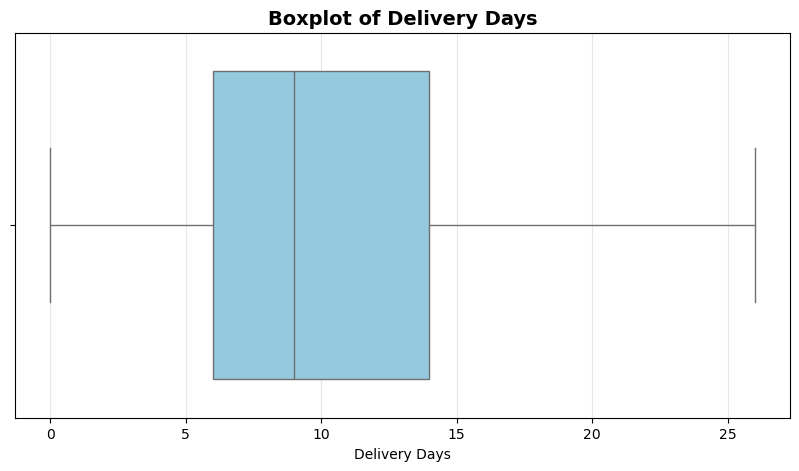

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.boxplot(x='delivery_days', data=df, color='skyblue')
plt.title('Boxplot of Delivery Days', fontsize=14, fontweight='bold')
plt.xlabel('Delivery Days')
plt.grid(axis='x', alpha=0.3)
plt.show()

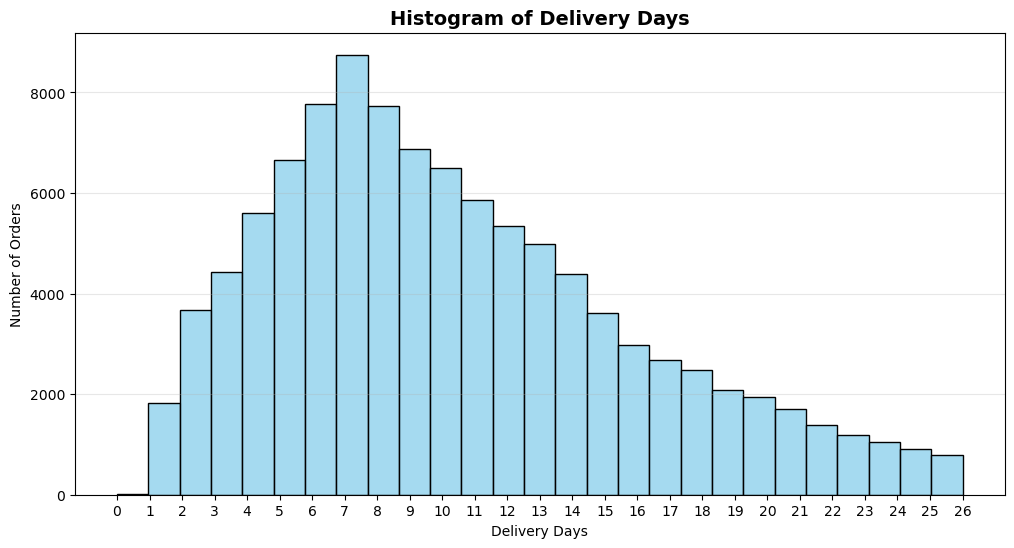

In [23]:
plt.figure(figsize=(12, 6))
sns.histplot(df['delivery_days'], bins=27, kde=False, color='skyblue')
plt.title('Histogram of Delivery Days', fontsize=14, fontweight='bold')
plt.xlabel('Delivery Days')
plt.ylabel('Number of Orders')
plt.xticks(range(0, 27, 1))
plt.grid(axis='y', alpha=0.3)
plt.show()

# 2.EDA

In [24]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)

Numeric columns: ['order_item_id', 'price', 'freight_value', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'customer_zip_code_prefix', 'review_score', 'delivery_days', 'is_late', 'review_binary']
Categorical columns: ['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'product_id', 'seller_id', 'shipping_limit_date', 'product_category_name', 'customer_unique_id', 'customer_city', 'customer_state', 'review_id', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp']


In [25]:
id_cols = [
    'order_id', 'customer_id', 'product_id', 
    'seller_id', 'review_id'
]

df_eda = df.drop(columns=id_cols)

In [26]:
numeric_cols = [
    'price', 'freight_value',
    'product_name_lenght', 'product_description_lenght',
    'product_photos_qty', 'product_weight_g',
    'product_length_cm', 'product_height_cm', 'product_width_cm',
    'delivery_days'
]

categorical_cols = [col for col in df_eda.columns if col not in numeric_cols]

print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)

Numeric columns: ['price', 'freight_value', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'delivery_days']
Categorical columns: ['order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'order_item_id', 'shipping_limit_date', 'product_category_name', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state', 'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp', 'is_late', 'review_binary']


In [27]:
df[numeric_cols].describe()

,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,delivery_days
count,103186.000000,103186.000000,103186.000000,103186.000000,103186.000000,103186.000000,103186.000000,103186.000000,103186.000000,103186.000000
mean,117.879974,19.447235,48.152850,774.366019,2.184705,2032.829667,29.984814,16.374857,22.933867,10.291910
std,178.266205,14.951569,11.458521,652.199015,1.730539,3646.425700,15.977653,13.190803,11.628091,5.751327
min,0.850000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.900000,12.810000,42.000000,341.000000,1.000000,300.000000,18.000000,8.000000,15.000000,6.000000
50%,72.620000,16.110000,51.000000,594.000000,1.000000,675.000000,25.000000,13.000000,20.000000,9.000000
75%,129.990000,20.600000,57.000000,973.000000,3.000000,1750.000000,37.000000,20.000000,30.000000,14.000000
max,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,26.000000


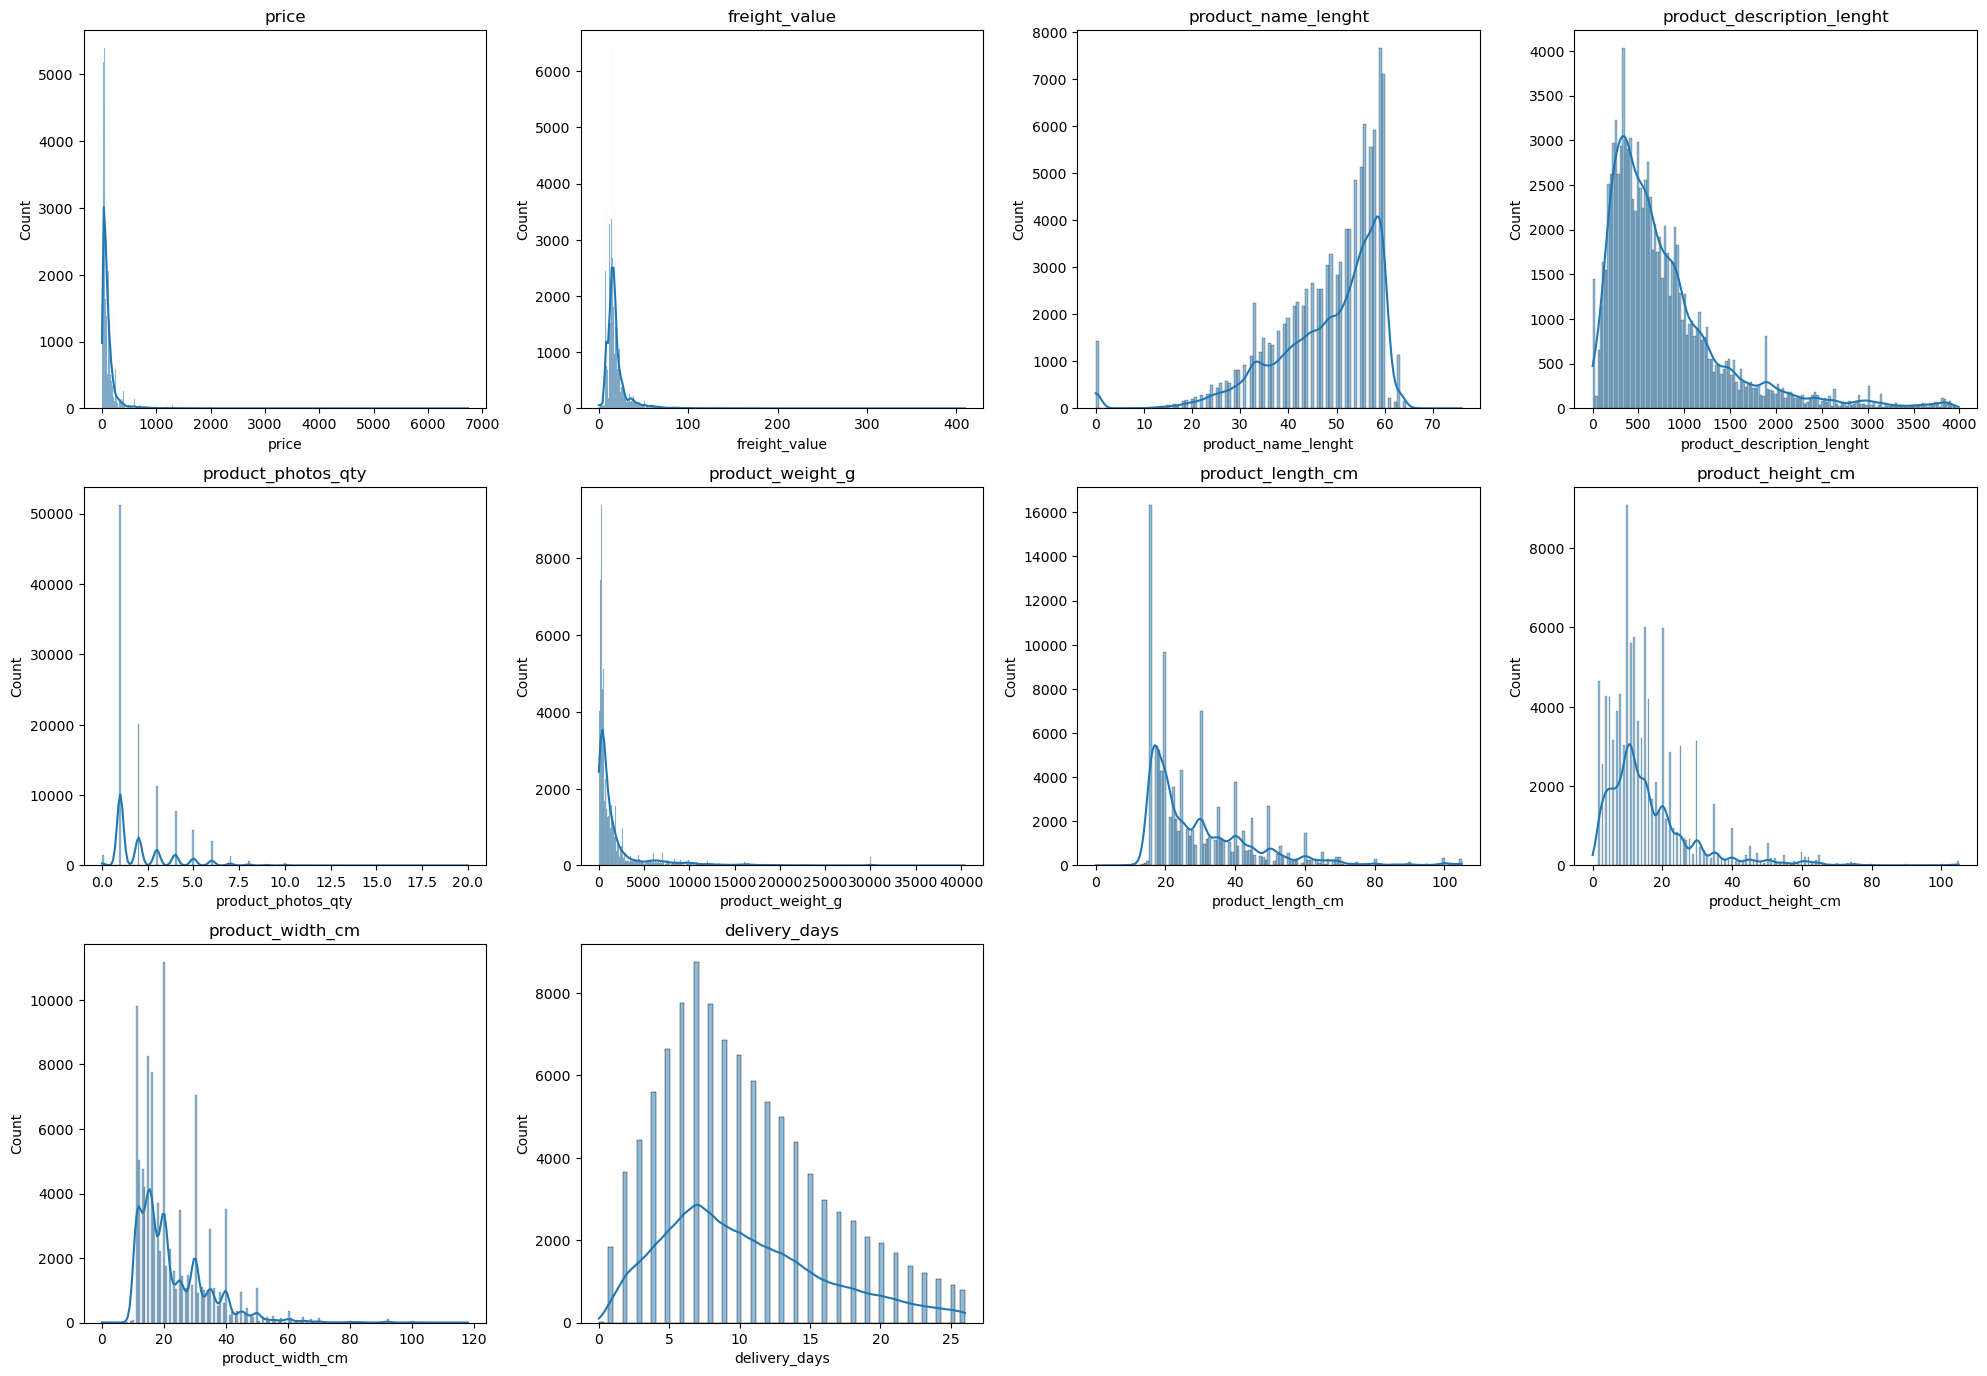

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 18))
for i, col in enumerate(numeric_cols):
    plt.subplot(4, 4, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

* **price:**

lệch phải mạnh.

Đại đa số các sản phẩm có giá rất thấp, tập trung gần 0 (có lẽ dưới 500 hoặc 1000, tùy thuộc vào đơn vị).

Có một số lượng nhỏ sản phẩm có giá cao hơn, kéo dài đến khoảng 7000.

sản phẩm trong tập dữ liệu đều nằm ở phân khúc giá thấp.

* **freight_value:**

Tương tự như 'price'

* **product_name_lenght:**

phân phối gần với phân phối chuẩn hơn, nhưng có thể lệch trái nhẹ.

Độ dài tên sản phẩm phổ biến nhất nằm trong khoảng từ 50 đến 60 ký tự.

Độ dài tên sản phẩm ít phổ biến hơn có thể rất ngắn (gần 0) hoặc dài hơn (đến khoảng 70).

Tên sản phẩm trong tập dữ liệu có xu hướng có độ dài trung bình và tương đối đồng đều, với phần lớn rơi vào khoảng 50-60 ký tự.

* **product_description_lenght:**

lệch phải mạnh và có hình dạng dốc hơn.

đa số các mô tả sản phẩm có độ dài rất ngắn, tập trung mạnh mẽ gần 0.

Hầu hết các sản phẩm có mô tả ngắn gọn, nhưng một số ít sản phẩm có mô tả rất chi tiết và dài.

* **product_photos_qty:**

lệch phải rất mạnh.

các sản phẩm chỉ có một (1) ảnh, hoặc rất ít ảnh (khoảng 0 đến 5).

hiếm sản phẩm có nhiều hơn 10 ảnh, mặc dù có thể kéo dài đến 20.

người bán chỉ cung cấp số lượng ảnh tối thiểu cho sản phẩm của họ.

* **product_weight_g:**

lệch phải rất mạnh.

các sản phẩm có trọng lượng rất nhẹ, tập trung gần 0 (hoặc dưới 5000).

trọng lượng có thể kéo dài đến 40000, nhưng số lượng sản phẩm nặng là rất ít.

tập dữ liệu chủ yếu bao gồm các mặt hàng nhẹ.

* **product_length_cm:**

lệch phải mạnh.

Chiều dài sản phẩm phổ biến nhất nằm trong khoảng từ 10 đến 20. Có một đỉnh cao rõ rệt ở khoảng 10.

Chiều dài tối đa kéo dài đến khoảng 100.

Các sản phẩm thường có kích thước nhỏ gọn.

* **product_height_cm:**

lệch phải mạnh.

Tương tự chiều dài, chiều cao cũng tập trung ở mức thấp, với đỉnh phổ biến nhất có lẽ là dưới 10.

Chiều cao tối đa kéo dài đến khoảng 100.

Chiều cao của sản phẩm thường không quá cao.

* **product_width_cm:**

lệch phải mạnh.

Chiều rộng sản phẩm tập trung phổ biến nhất quanh 10 đến 20.

Chiều rộng tối đa kéo dài đến khoảng 120.

Cả ba kích thước (dài, rộng, cao) đều cho thấy sản phẩm chủ yếu là nhỏ và nhẹ, phù hợp với xu hướng trong các biểu đồ trước.

* **delivery_days:**

Phân phối gần chuẩn nhưng lệch phải nhẹ.

Số ngày giao hàng phổ biến nhất (trung bình) nằm trong khoảng từ 5 đến 15 ngày, với đỉnh phổ biến nhất có lẽ là khoảng 10 ngày.

Thời gian giao hàng kéo dài từ gần 0 đến khoảng 25-30 ngày.

Hầu hết các đơn hàng được giao trong khoảng 1-2 tuần.

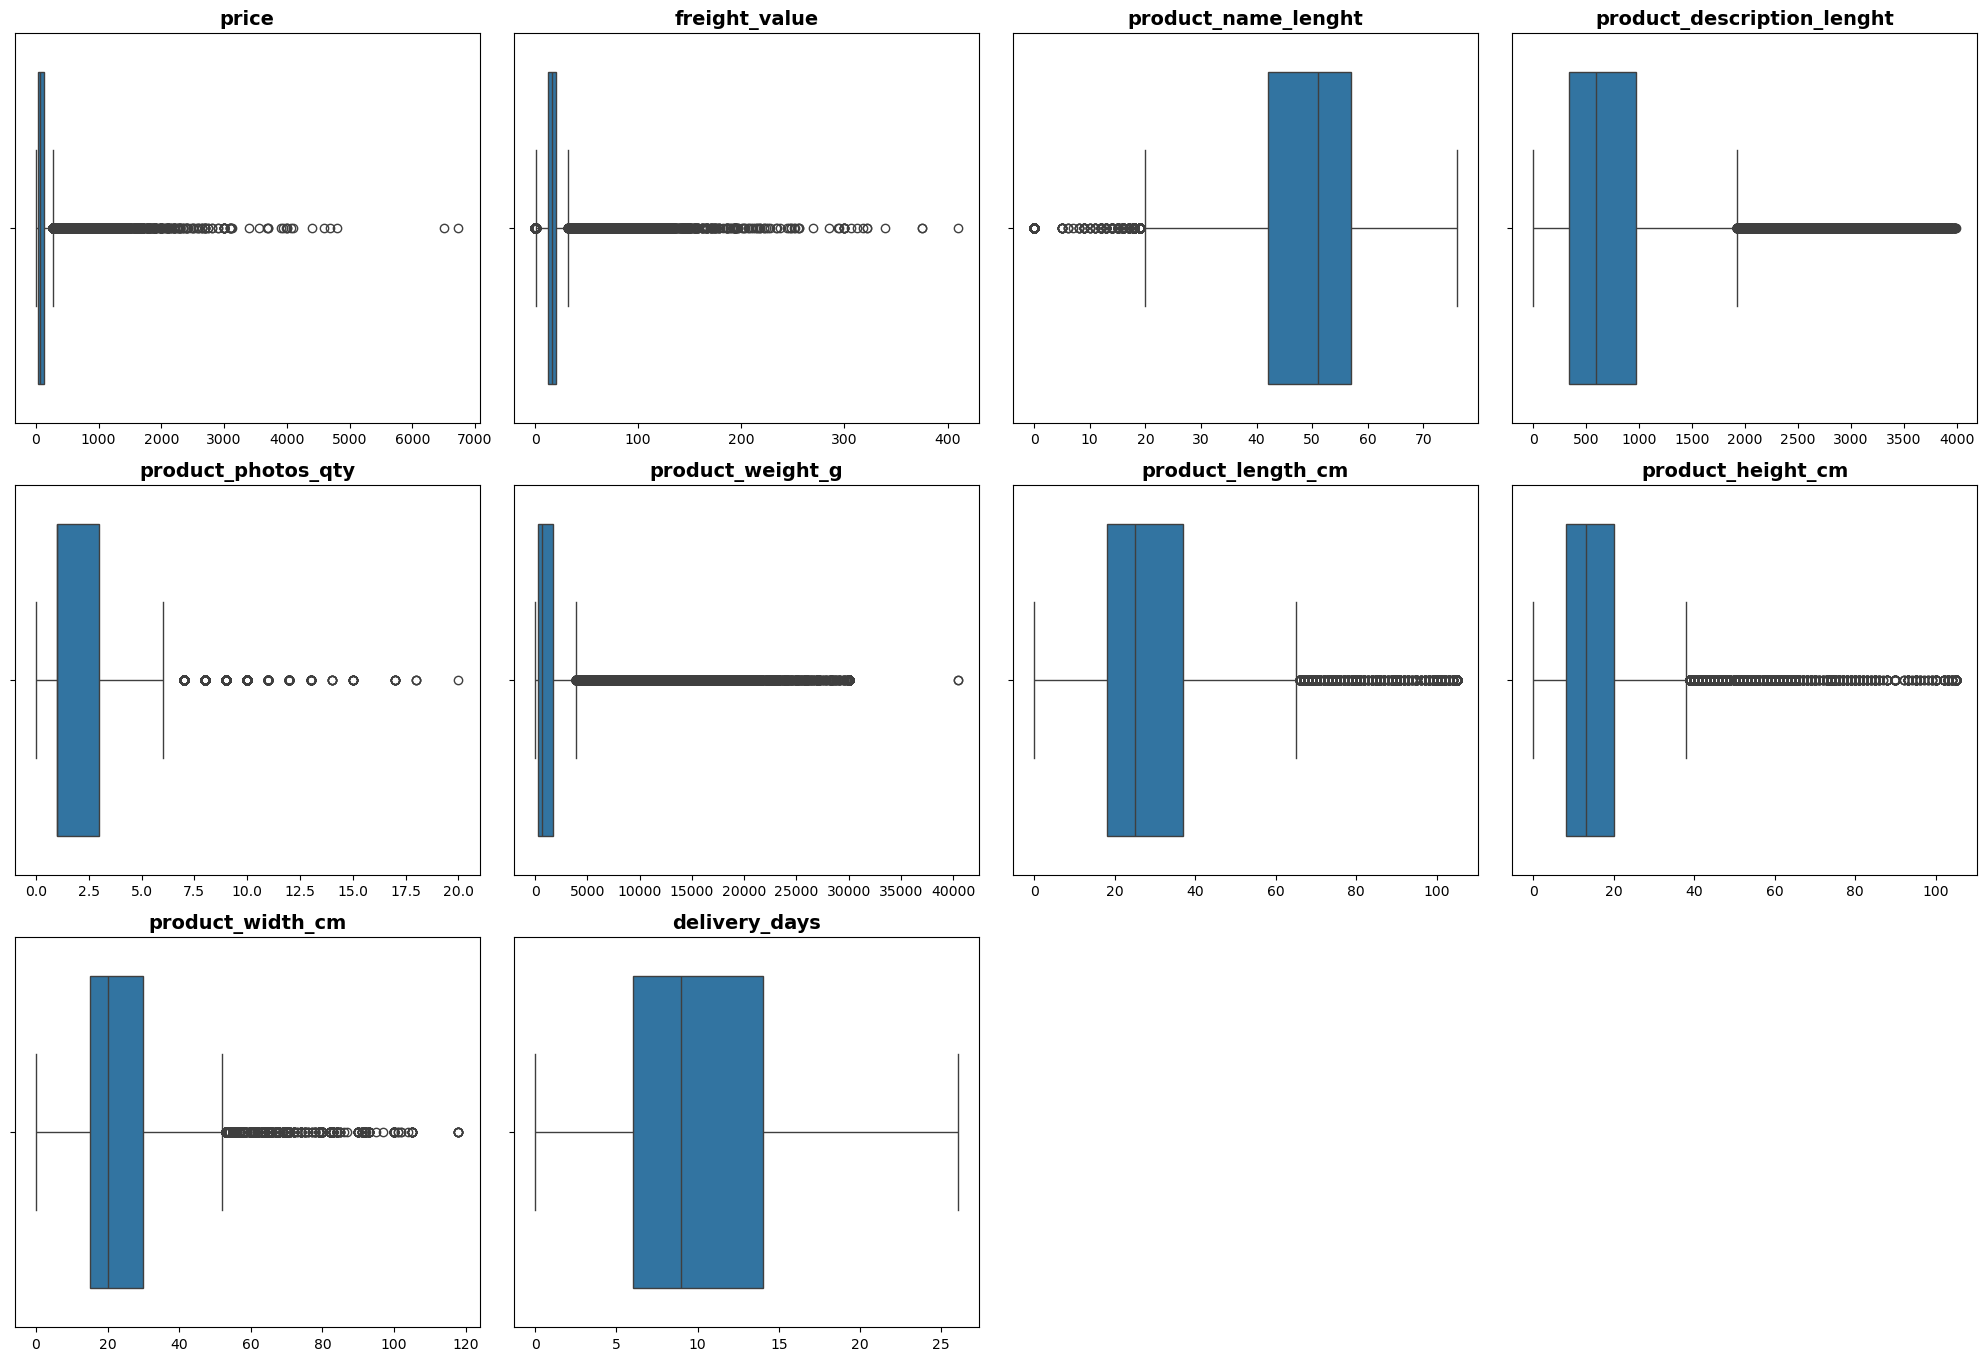

In [29]:
plt.figure(figsize=(20, 18))
for i, col in enumerate(numeric_cols):
    plt.subplot(4, 4, i+1)
    sns.boxplot(x=df[col])
    plt.title(col, fontsize=14, fontweight='bold')
    plt.xlabel("")
plt.tight_layout()
plt.show()

Tương tự như phân tích với biểu đồ histogram, với một số giá trị nằm ngoài râu của boxplot có thể hiểu được ý nghĩa như giá của một số sản phẩm có thể sẽ mắc; phí vận chuyển có thể sẽ cao (cần xét nhiều yếu tố); những đặc trưng về sản phẩm như dài, rộng cao,... sẽ có nhiều mặc hàng nặng vì đây là dữ liệu về sàn thương mại điện tử có thể sẽ có nhiều mặc hàng như nội thất, thiết bị...

In [30]:
for col in numeric_cols:
    print(f"{col}: skew={df[col].skew():.2f}, kurtosis={df[col].kurt():.2f}")

price: skew=8.00, kurtosis=121.38
freight_value: skew=5.65, kurtosis=62.67
product_name_lenght: skew=-1.50, kurtosis=3.02
product_description_lenght: skew=1.98, kurtosis=4.85
product_photos_qty: skew=1.85, kurtosis=4.49
product_weight_g: skew=3.64, kurtosis=16.75
product_length_cm: skew=1.76, kurtosis=3.79
product_height_cm: skew=2.27, kurtosis=7.63
product_width_cm: skew=1.71, kurtosis=4.64
delivery_days: skew=0.67, kurtosis=-0.18


**ĐỘ LỆCH:**
$$\text{Skewness} = \frac{\frac{1}{n}\sum_{i=1}^{n} (x_i - \bar{x})^3}{\left(\frac{1}{n}\sum_{i=1}^{n} (x_i - \bar{x})^2\right)^{3/2}}$$

**Độ nhọn (Kurtosis):**
$$
\text{Kurtosis} = \frac{\frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^4}{\left(\frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2 \right)^2} - 3
$$

1. Price

Skew = 8.0 → lệch phải rất mạnh (đa số sản phẩm giá thấp, một số cực cao kéo dài đuôi phải).

Kurtosis = 121.38 → rất nhọn, dữ liệu tập trung cực kỳ vào các giá trị phổ biến (thường là giá thấp), nhưng có một số giá trị ngoại lai cực cao.

→ Phân phối rất lệch và có outlier mạnh.

2. Freight_value

Skew = 5.65 → lệch phải mạnh, hầu hết đơn vận chuyển có giá thấp.

Kurtosis = 62.67 → nhọn, tập trung nhiều vào giá vận chuyển phổ biến.

3. Product_name_lenght

Skew = -1.50 → lệch trái, nghĩa là nhiều tên sản phẩm dài hơn trung bình, ít tên ngắn.

Kurtosis = 3.02 → nhọn vừa phải, phân phối có độ tập trung tương đối.

4. Product_description_lenght

Skew = 1.98 → lệch phải vừa phải, nhiều mô tả ngắn, ít mô tả dài.

Kurtosis = 4.85 → nhọn hơn chuẩn, nhưng không quá cực đoan.

5. Product_photos_qty

Skew = 1.85 → lệch phải, đa số sản phẩm có 1–3 ảnh, ít sản phẩm nhiều ảnh.

Kurtosis = 4.49 → nhọn vừa, tập trung quanh giá trị phổ biến.

6. Product_weight_g

Skew = 3.64 → lệch phải mạnh, hầu hết sản phẩm nhẹ, một số cực nặng kéo dài đuôi phải.

Kurtosis = 16.75 → nhọn, nhiều giá trị tập trung gần trọng lượng thấp.

7. Product_length_cm / height / width

Skew ~ 1.7–2.3 → lệch phải vừa phải đến mạnh, đa số sản phẩm nhỏ/nhỏ vừa.

Kurtosis ~ 3.7–7.6 → nhọn hơn phân phối chuẩn, tập trung vào các kích thước phổ biến.

8. Delivery_days

Skew = 0.67 → lệch phải nhẹ, hầu hết đơn hàng giao nhanh, vài đơn lâu kéo đuôi phải.

Kurtosis = -0.18 → gần phân phối chuẩn, hơi dẹt, dữ liệu trải rộng hơn chuẩn.

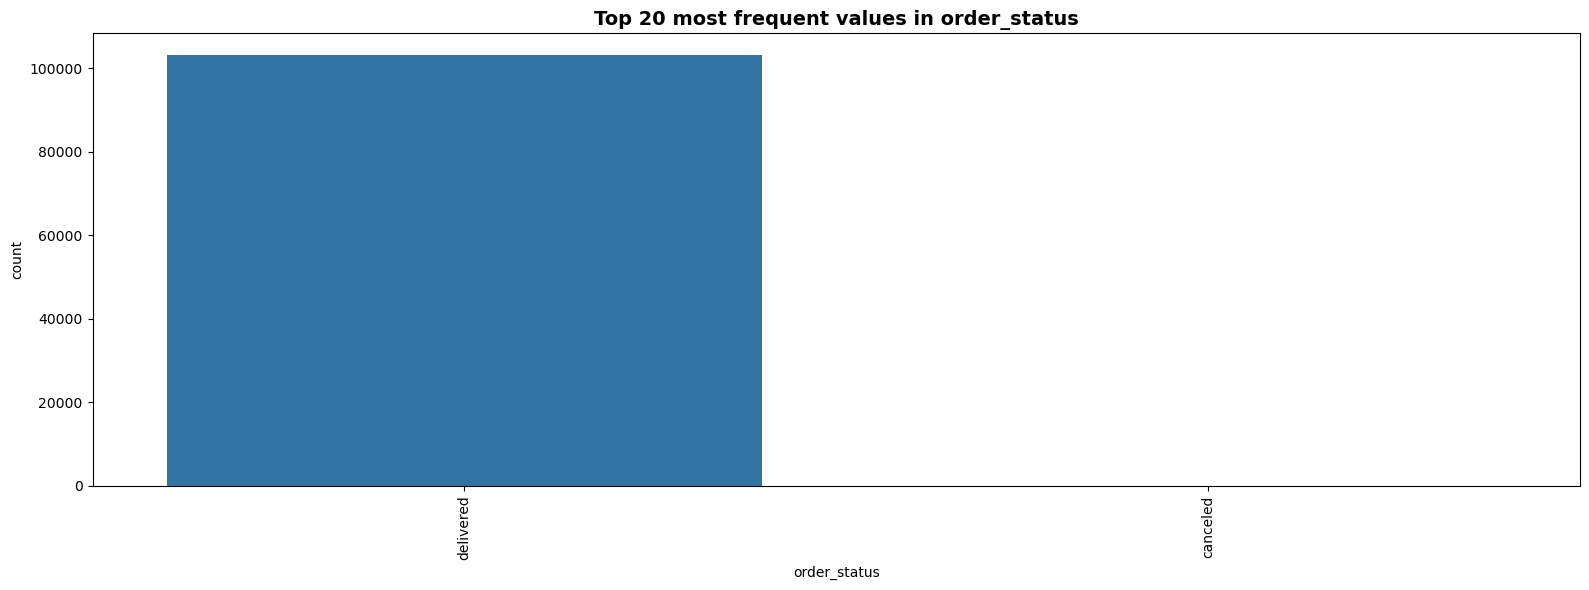

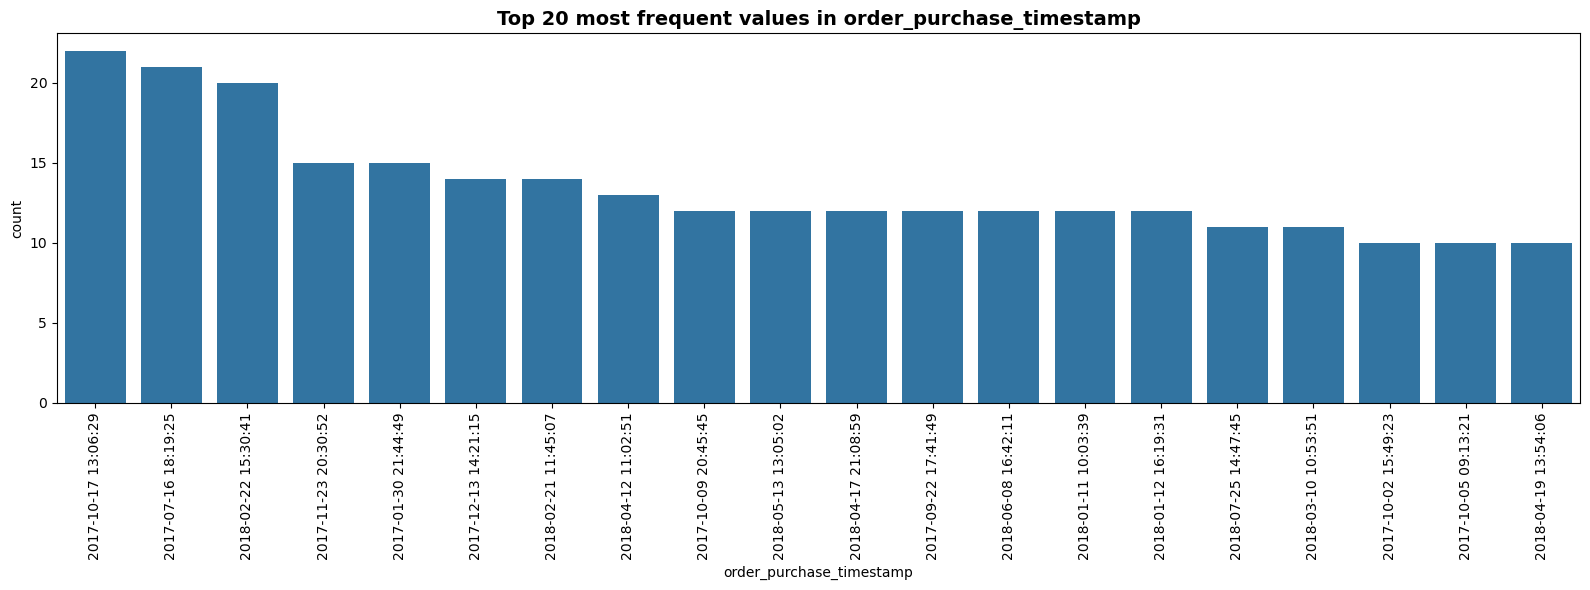

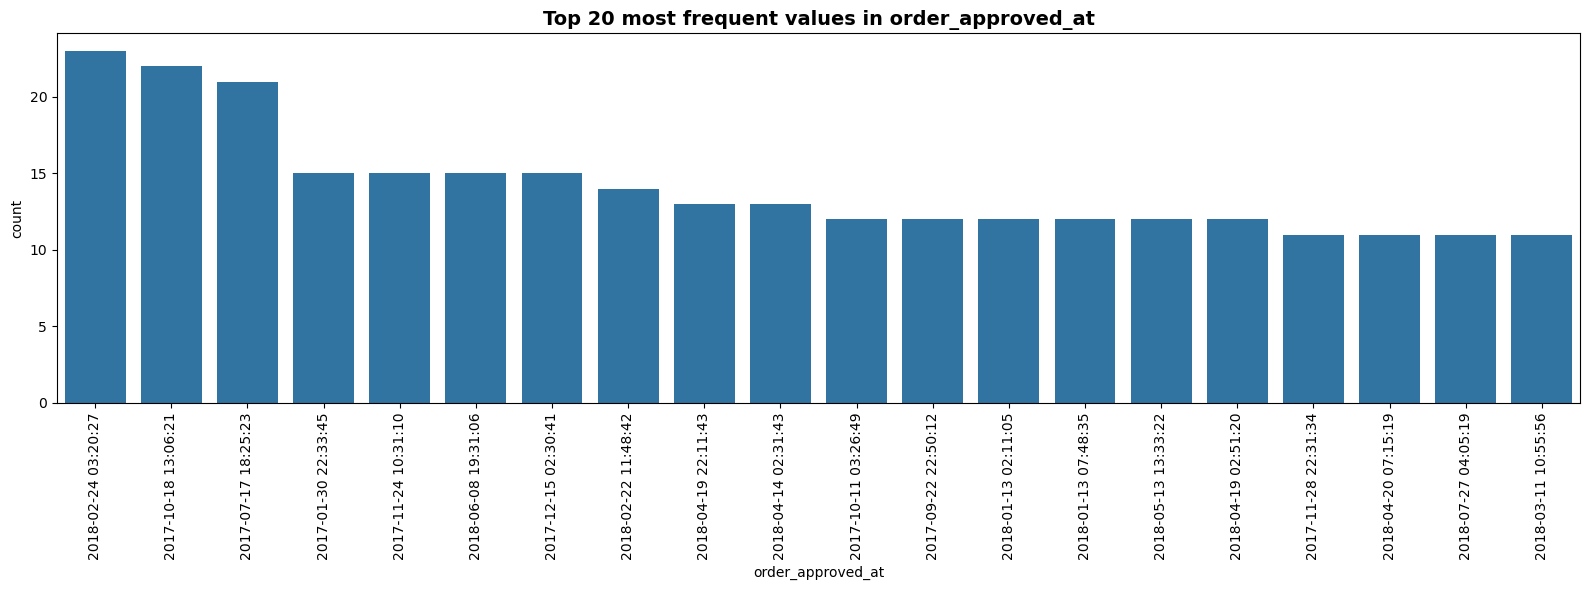

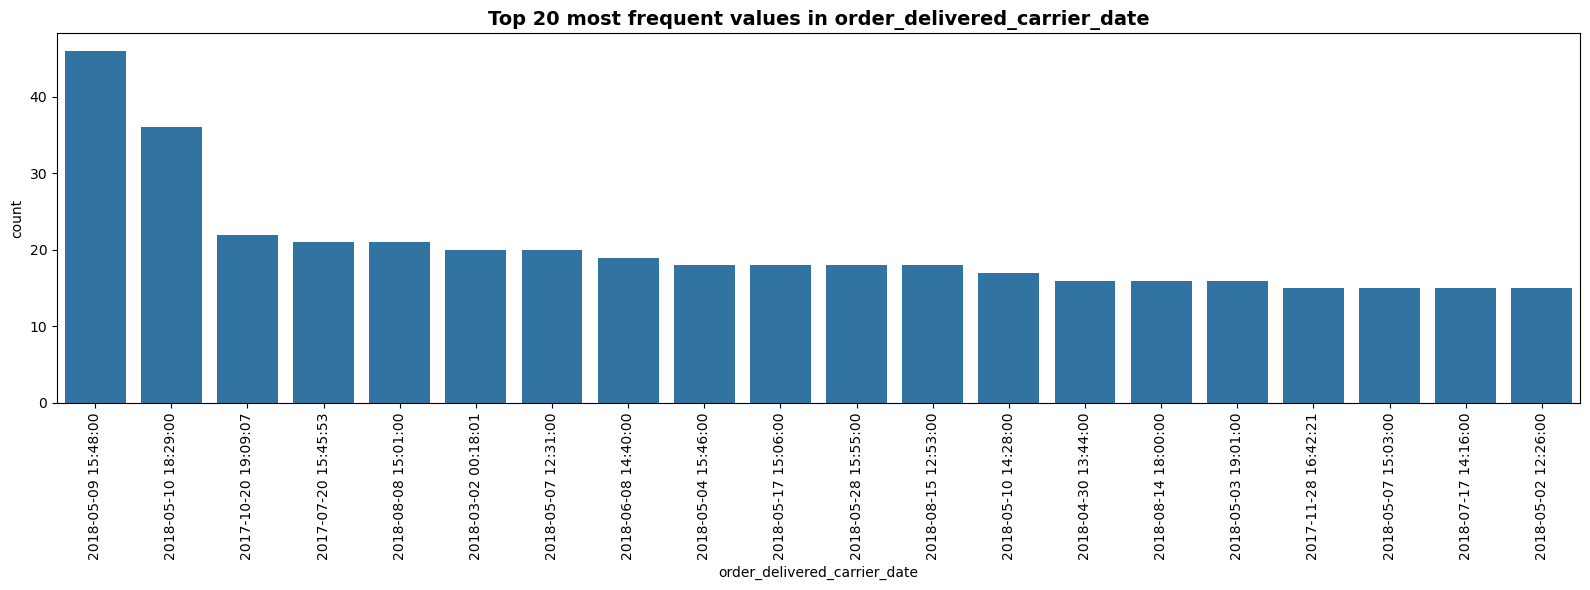

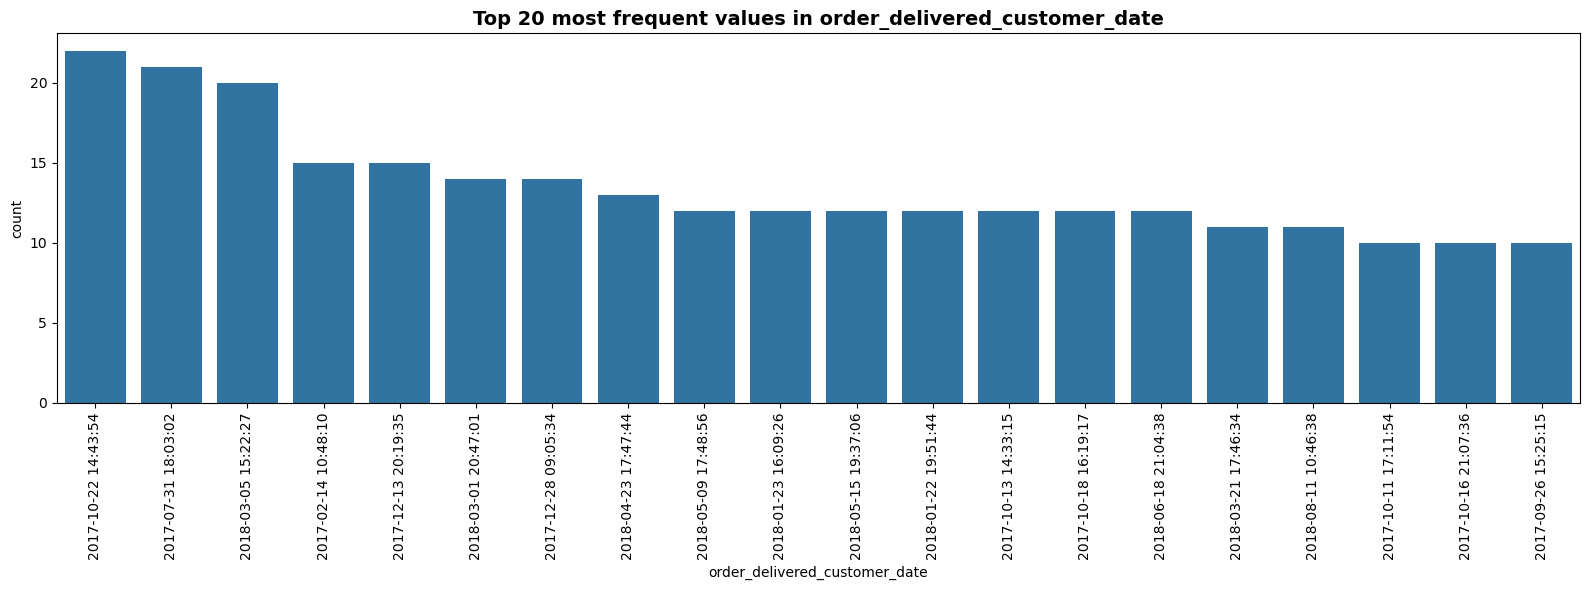

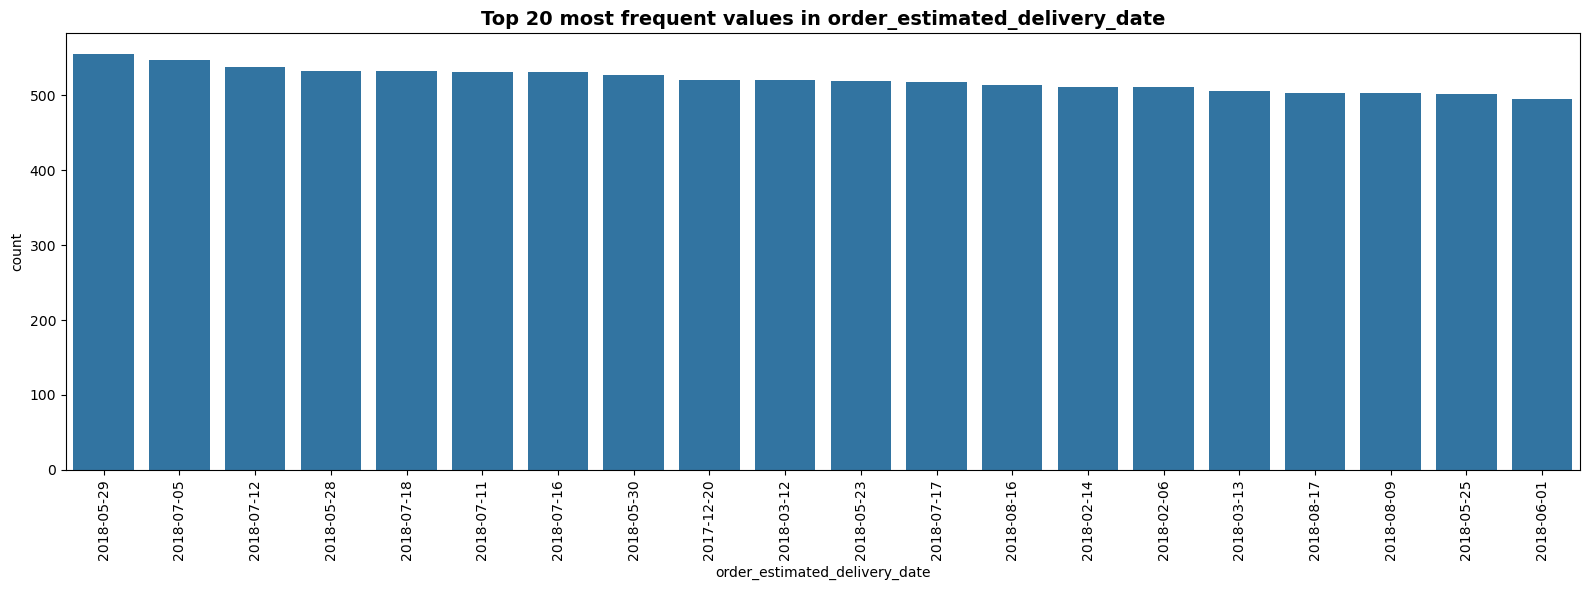

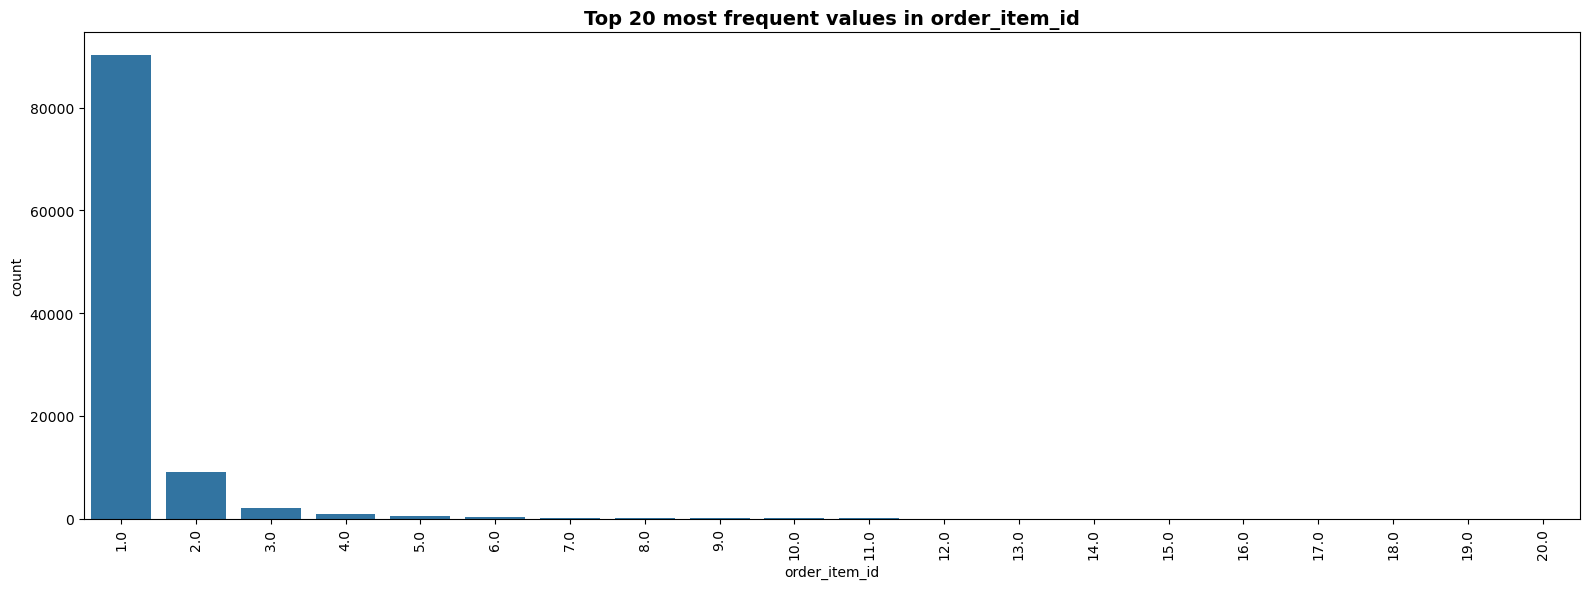

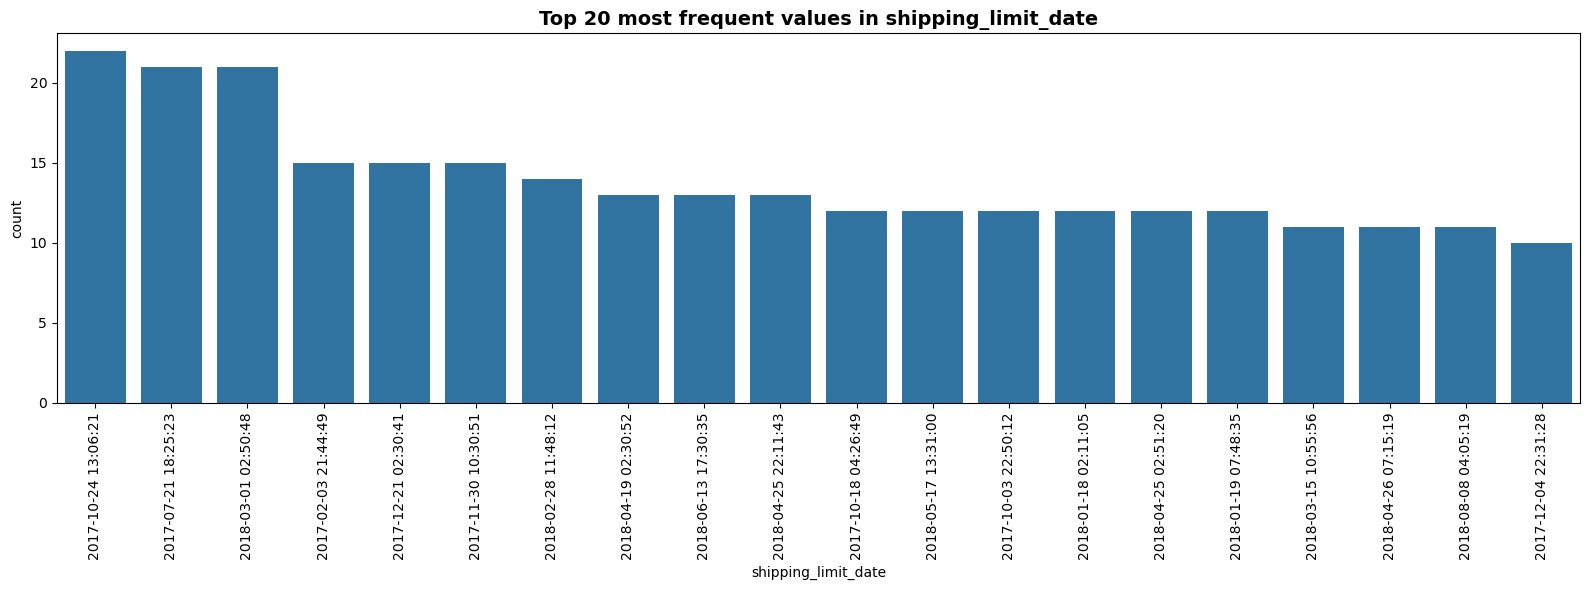

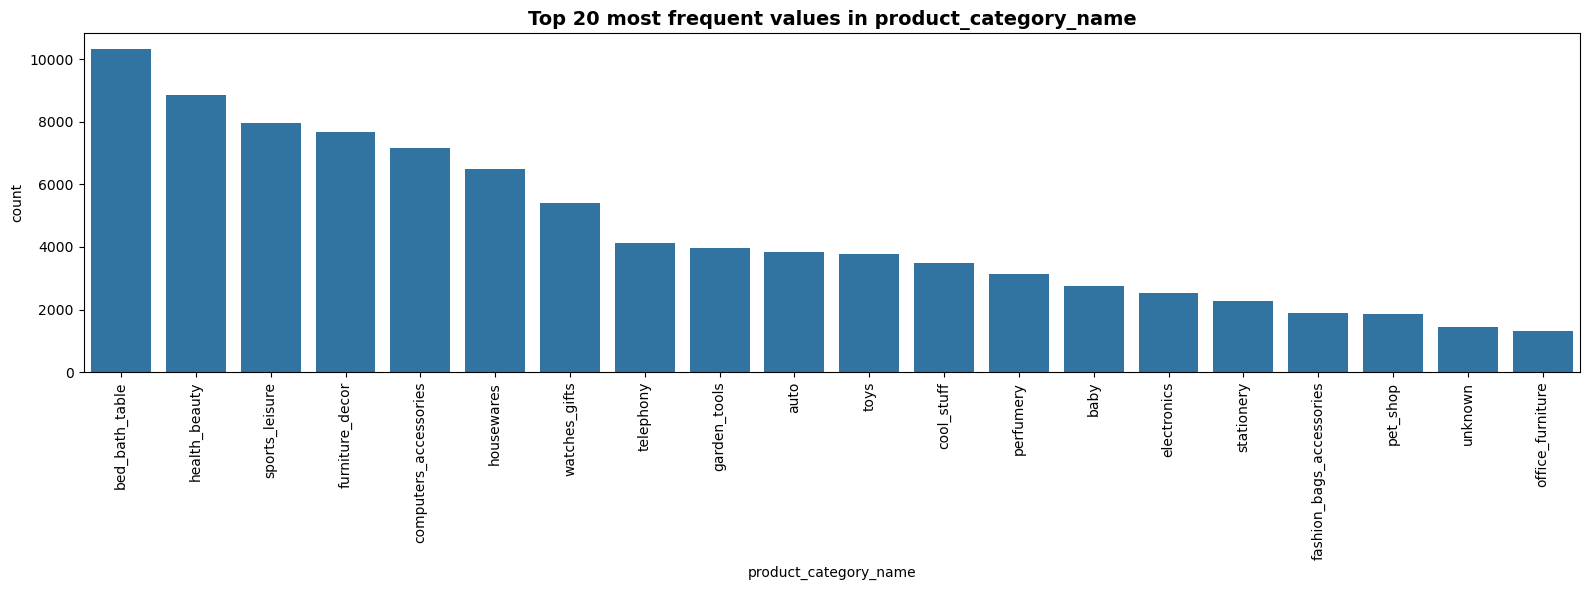

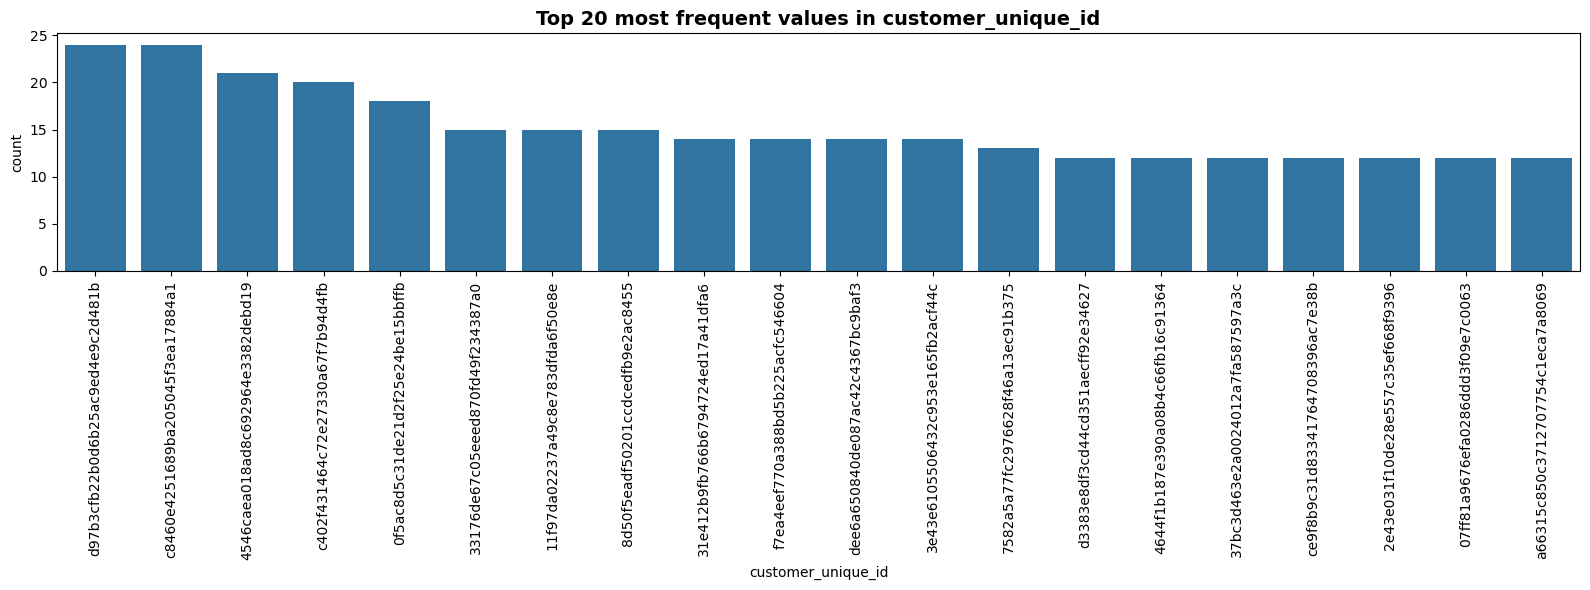

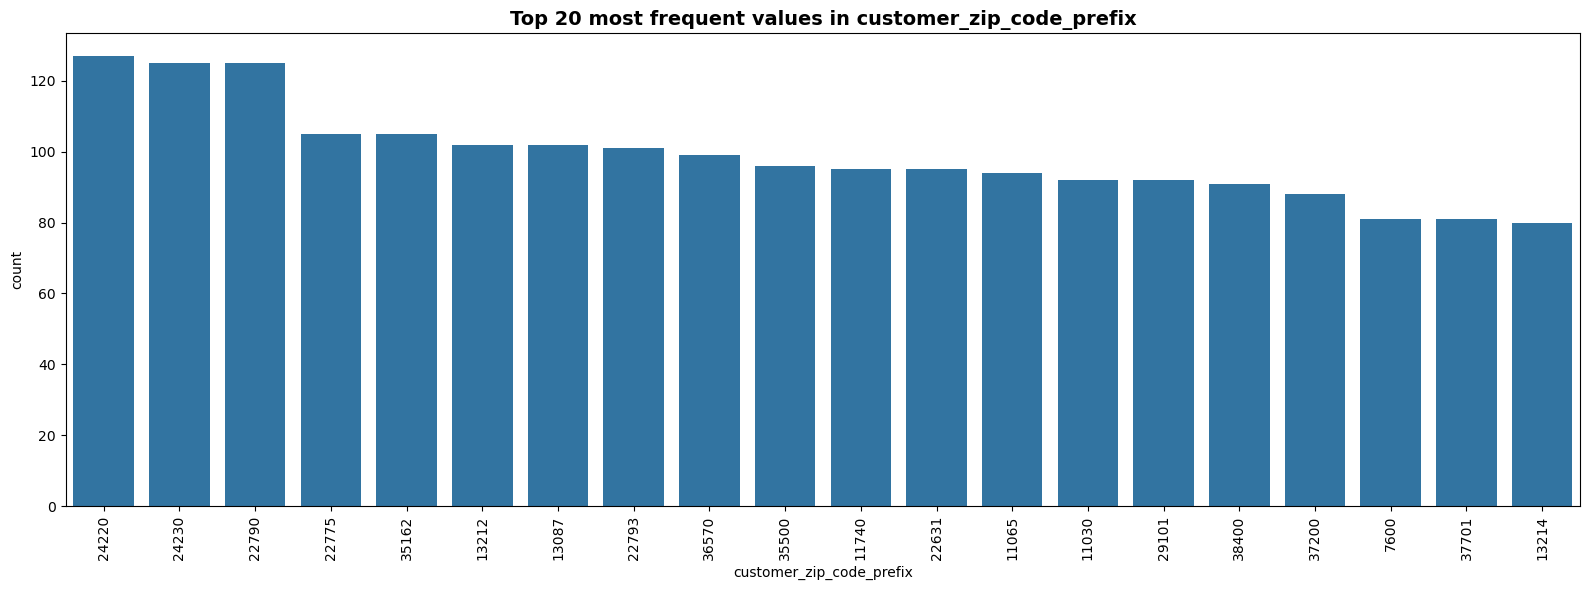

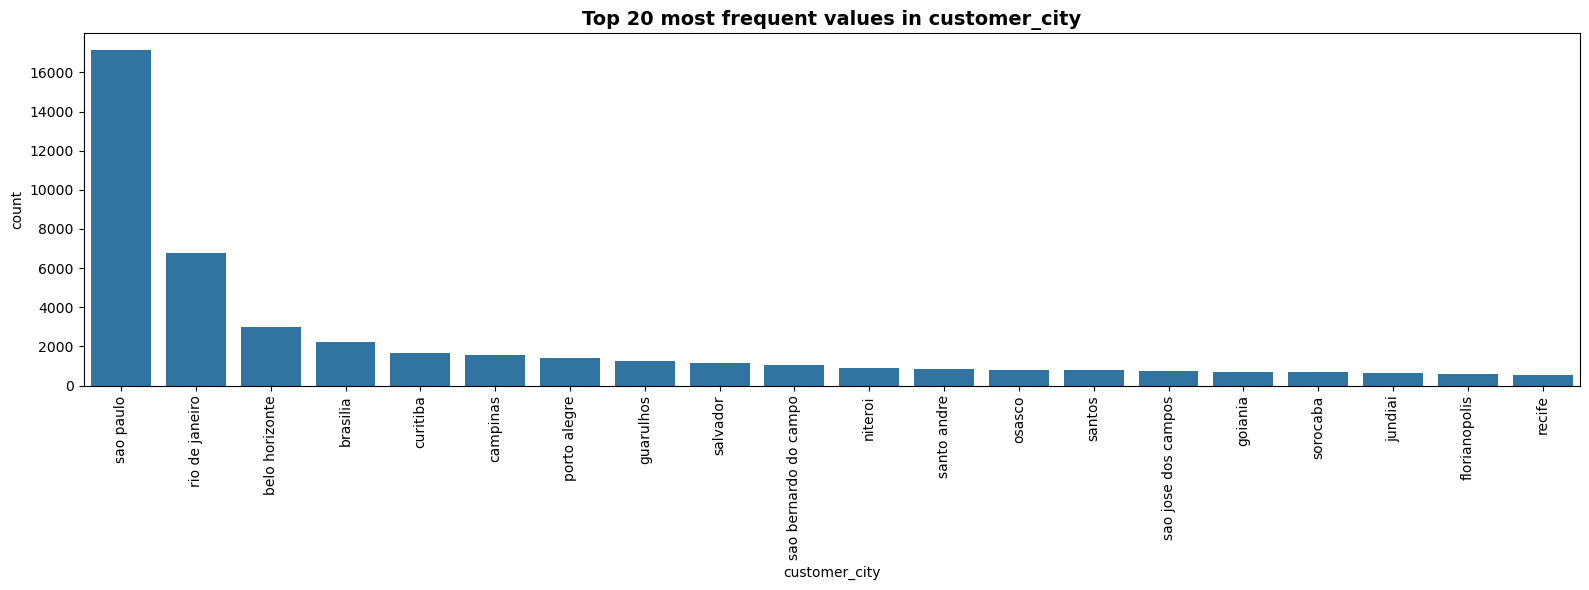

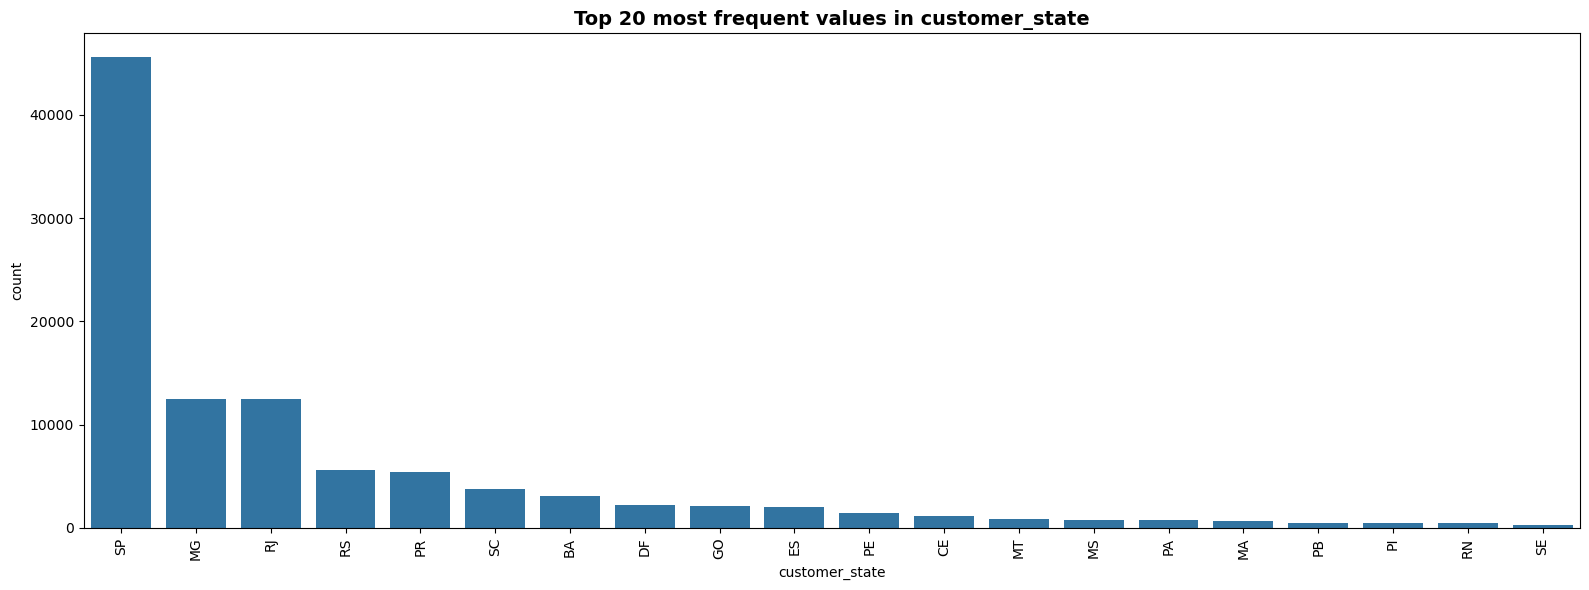

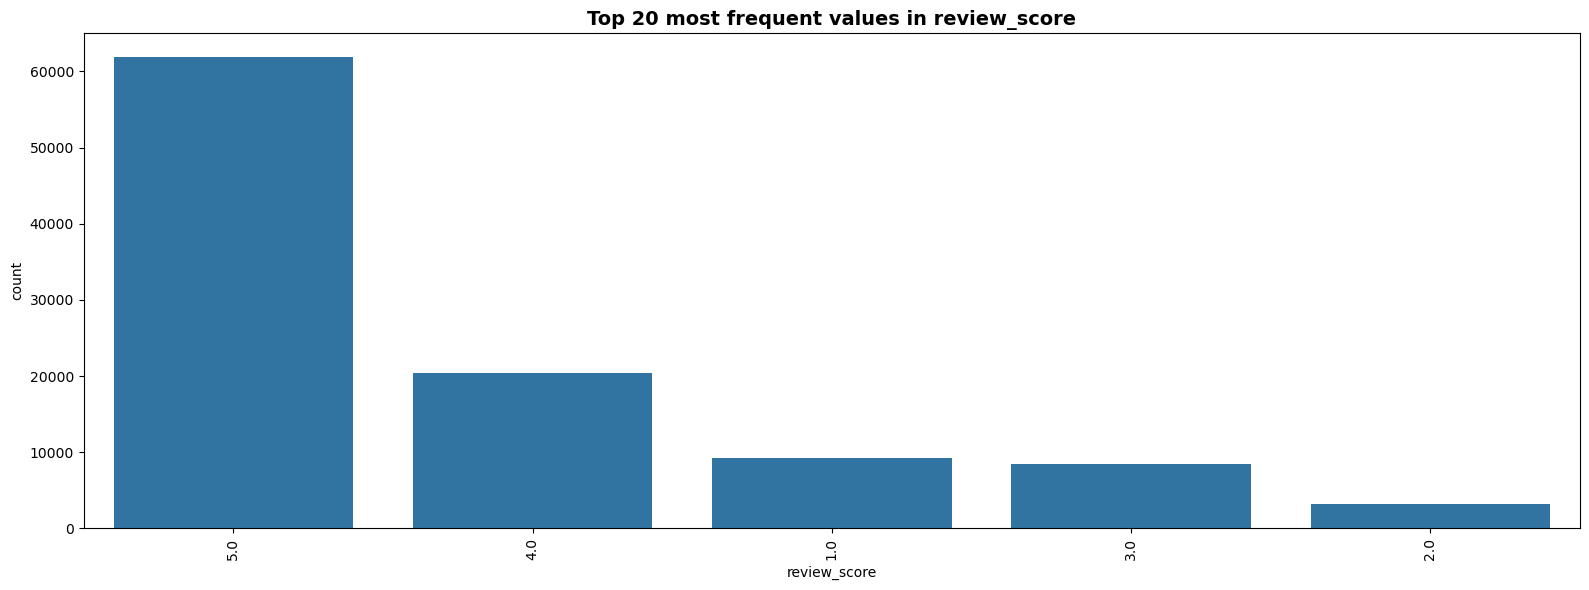

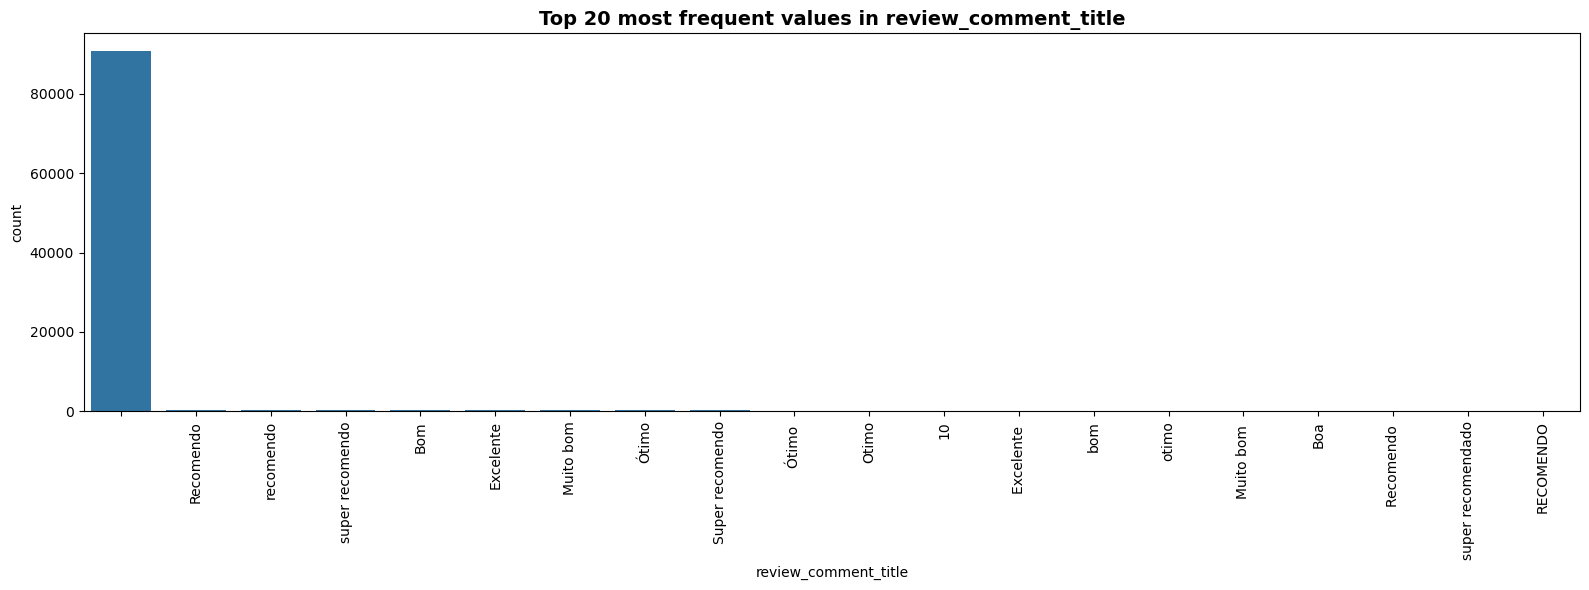

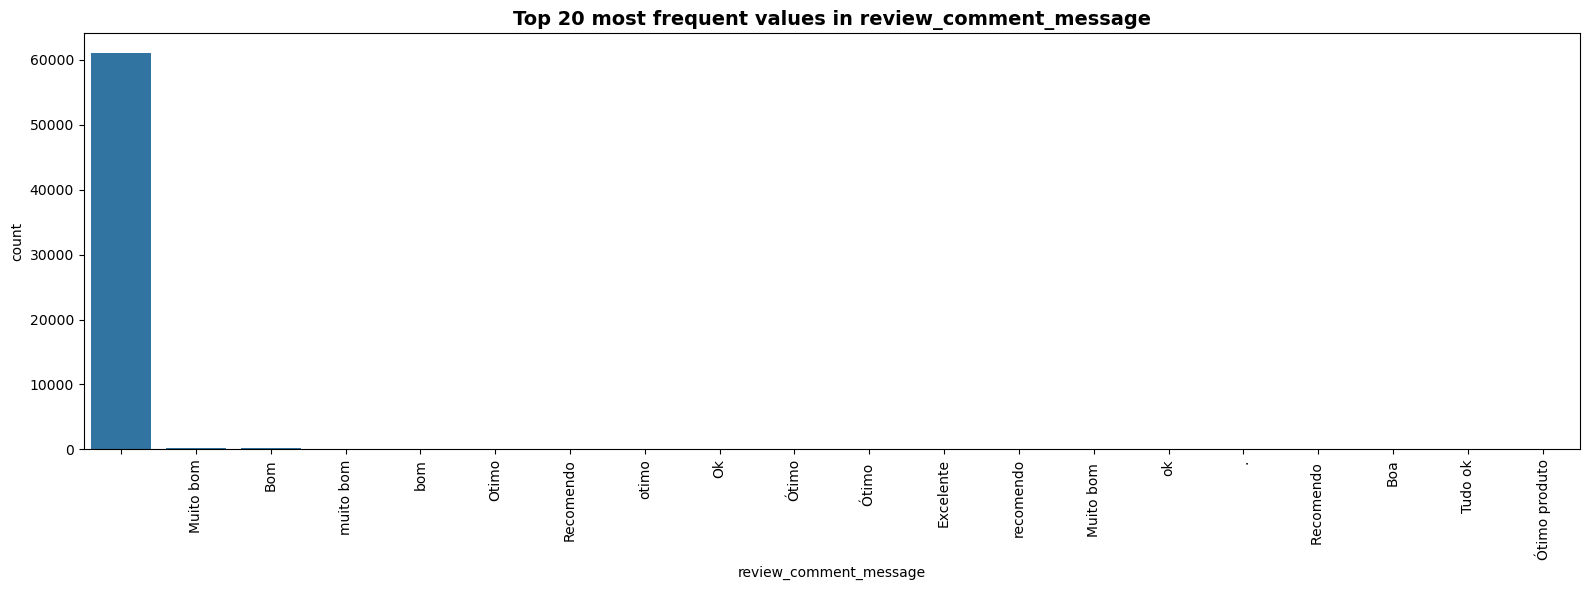

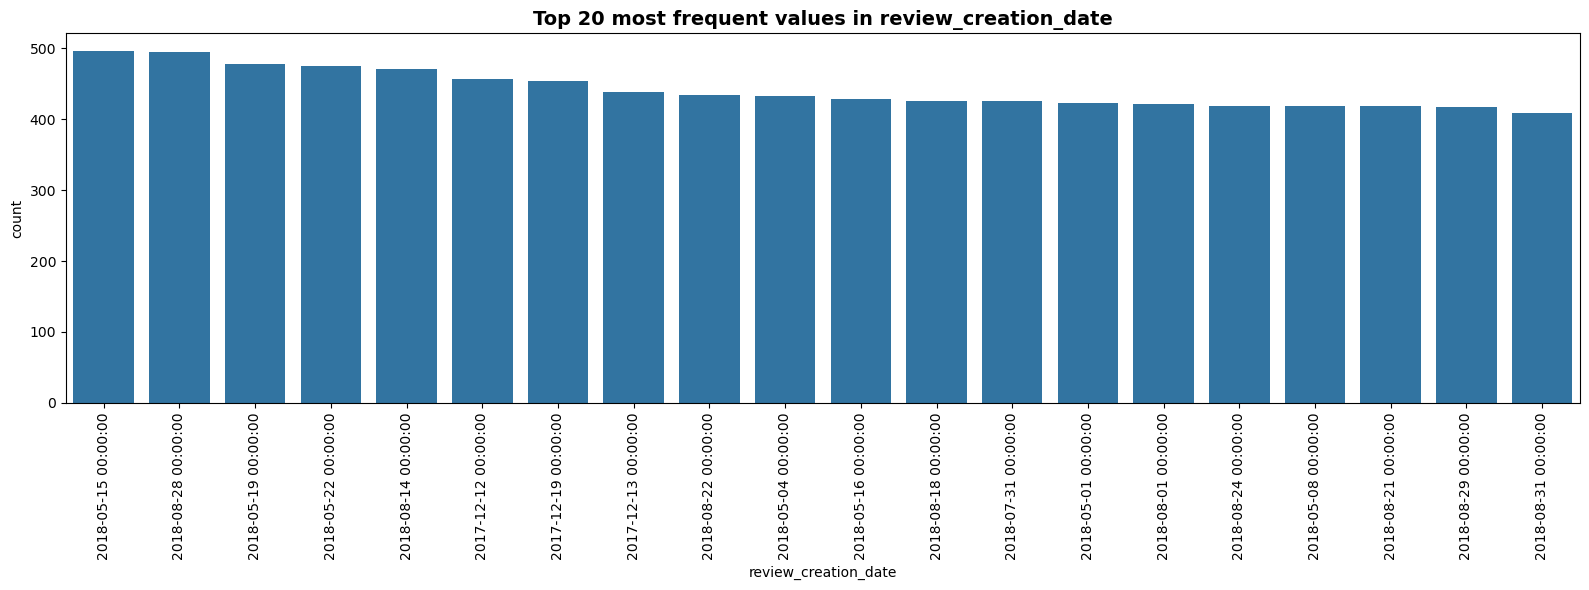

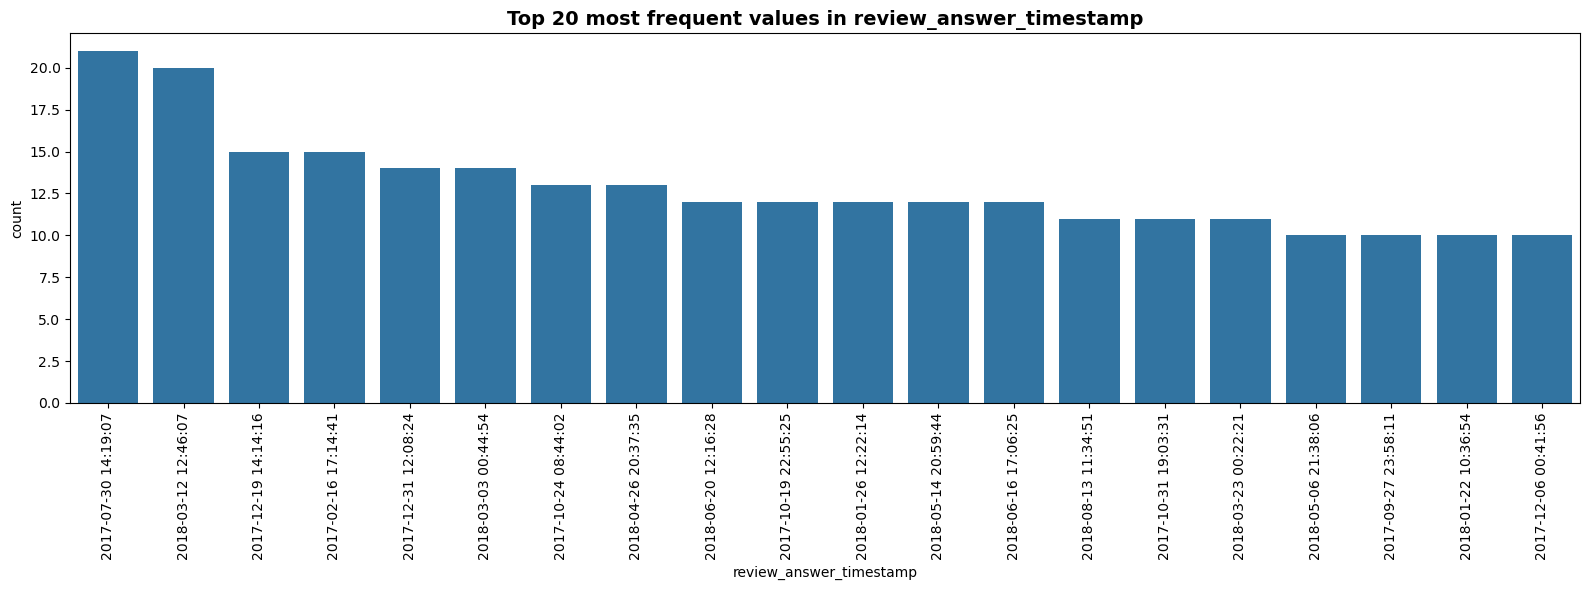

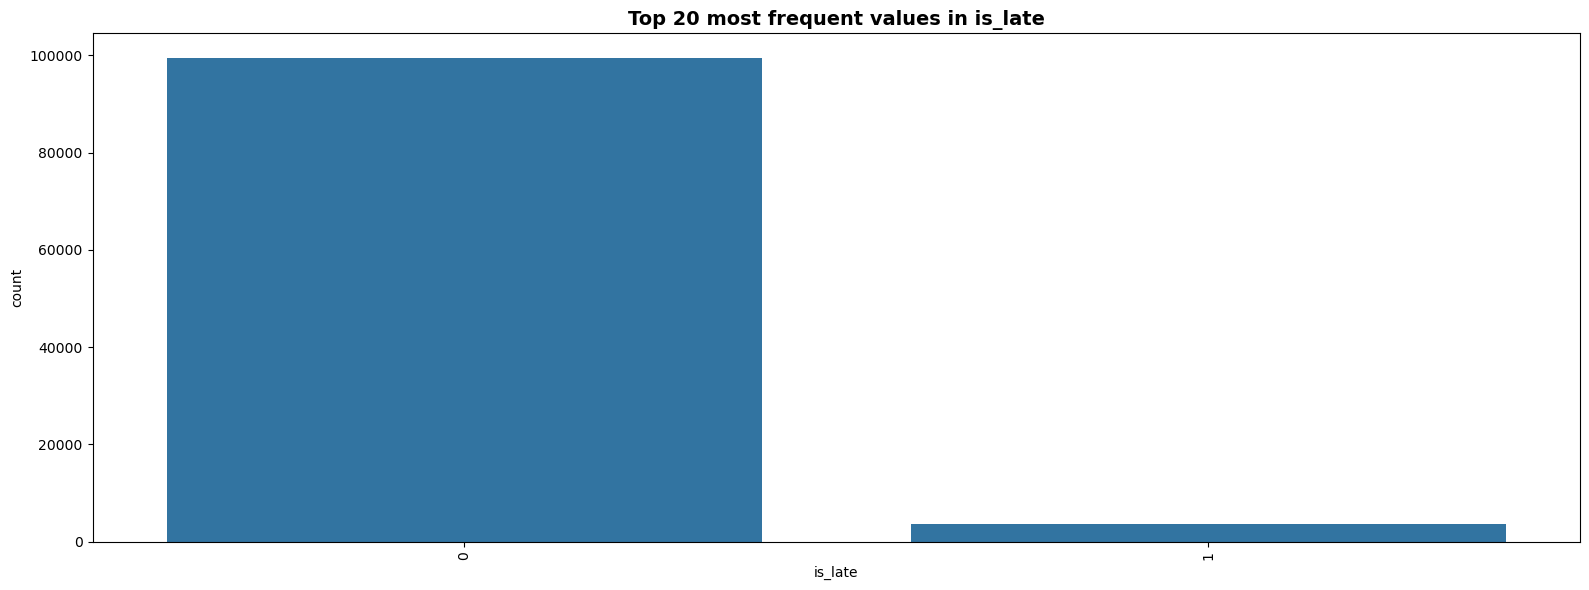

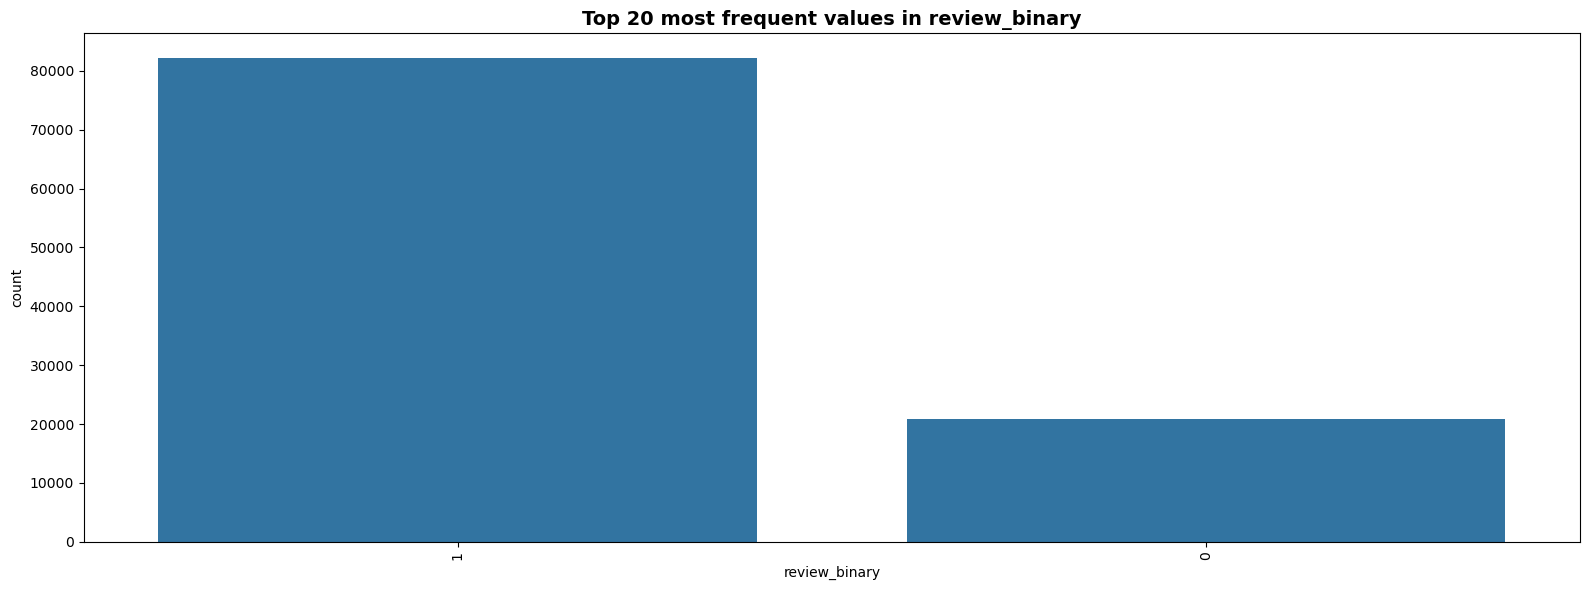

In [31]:
for col in categorical_cols:
    plt.figure(figsize=(16, 6))
    top20 = df[col].value_counts().head(20).index
    sns.countplot(
        data=df[df[col].isin(top20)],
        x=col,
        order=top20
    )
    plt.title(f"Top 20 most frequent values in {col}", fontsize=14, fontweight='bold')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

Phần biểu đồ countplot chỉ hiển thị top 20 tần suất xuất hiện nhiều nhất:

Nhìn chung các khoảng thời gian của những cột 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', review_creation_date', 'review_answer_timestamp', 'shipping_limit_date' đều phân bố như nhau 

'order_item_id' biểu hiện cho thứ tự trong đơn, thường tập trung mua 1 mặc hàng hoặc có thể trong 1 hóa đơn có nhiều mặc hàng

'product_category_name' tập trung nhiều vào sản phẩm giường, nhà tắm, những sản phẩm còn lại tập trung đều

'customer_unique_id' có nhiều khách hàng mua lại sản phẩm có thể phân tích tệp khách hàng hay khách hàng sau khi mua lần 1 có quay lại nhiều lần nữa không

'customer_zip_code_prefix' tượng trưng cho mã tra cứu bảng vị trí nên sẽ phân tích thông qua "customer_city" tập trung nhiều ở thành phố sao paulo

'review_score' tập trung nhiều vào đánh giá cao(5.0) có thể sẽ có bias

'review_comment_title' & 'review_comment_message' thường nhiều nhất là không để lại đánh giá hay hồi đáp lại giữa người bán và người mua

'Is_late' giao sớm hơn là giao muộn

'review_binary' những sản phẩm được đánh giá tốt hơn là không tốt

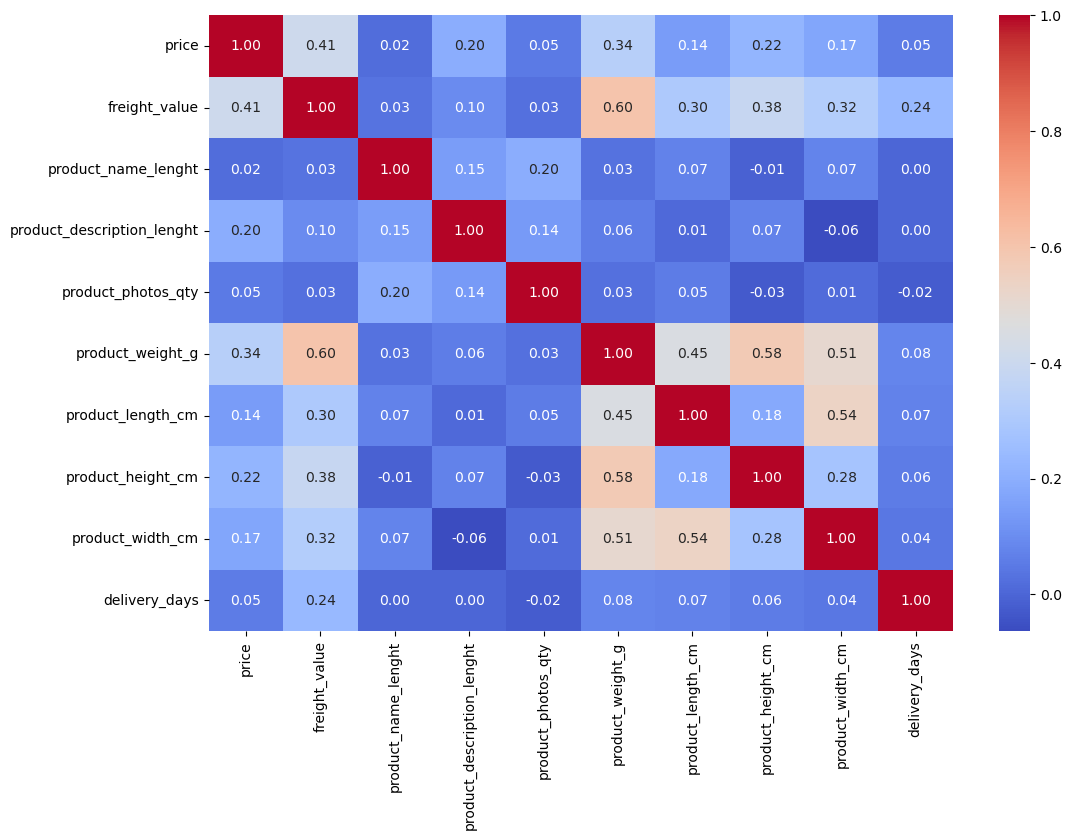

In [32]:
corr = df[numeric_cols].corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

1. Tương quan với Price

freight_value -> $0.41$ -> Tương quan dương vừa phải. Hàng hóa có giá cao hơn có xu hướng có chi phí vận chuyển cao hơn. (Điều này có thể do kích thước/trọng lượng lớn hơn hoặc giá trị bảo hiểm cao hơn).

product_weight_g -> $0.34$ -> Tương quan dương yếu đến vừa phải. Sản phẩm nặng hơn có xu hướng có giá cao hơn.

product_length_cm -> $0.30$ -> Tương quan dương yếu. Tương tự, sản phẩm dài hơn có giá cao hơn một chút.

product_height_cm -> $0.22$ -> Tương quan dương yếu.

product_width_cm -> $0.17$ -> Tương quan dương yếu.

delivery_days -> $0.05$ -> Tương quan rất yếu. Giá bán gần như không ảnh hưởng đến thời gian giao hàng, hoặc ngược lại.

2. Các cặp tương quan

product_weight_g & product_length_cm -> $0.60$ -> Tương quan dương mạnh. Sản phẩm nặng hơn có xu hướng dài hơn.

product_weight_g & product_height_cm -> $0.58$ -> Tương quan dương mạnh. Sản phẩm nặng hơn có xu hướng cao hơn.

product_weight_g & product_width_cm -> $0.51$ -> Tương quan dương vừa phải. Sản phẩm nặng hơn có xu hướng rộng hơn.

product_length_cm & product_width_cm -> $0.54$ -> Tương quan dương vừa phải.

3. Tương quan với freight_value

product_weight_g -> $0.60$ -> Tương quan dương mạnh. Trọng lượng là yếu tố quan trọng nhất ảnh hưởng đến chi phí vận chuyển.

product_height_cm -> $0.38$ -> Tương quan dương vừa phải.

product_length_cm ->$0.30$ -> Tương quan dương yếu.

* Dự đoán giá có thể chọn các đặc trưng: freight_value, product_weight_g, product_length_cm, product_height_cm và product_width_cm

* Phân tích trọng lượng / kích thước sản phẩm: product_weight_g, product_length_cm, product_height_cm, product_width_cm

* Dự đoán freight_value: product_weight_g, product_height_cm, product_length_cm

In [33]:
df['review_group'] = pd.cut(df['review_score'], 
                                bins=[0, 2, 3, 5], 
                                labels=['Low (1-2)', 'Medium (3)', 'High (4-5)'])

C:\Users\biena\AppData\Local\Temp\ipykernel_13232\3465279796.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_group'] = pd.cut(df['review_score'],


In [34]:
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,delivery_days,is_late,review_binary,review_group
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,...,a54f0611adc9ed256b57ede6b6eb5114,4.0,,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,8,0,1,High (4-5)
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,...,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,13,0,1,High (4-5)
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,...,e73b67b67587f7644d5bd1a52deb1b01,5.0,,,2018-08-18 00:00:00,2018-08-22 19:07:58,9,0,1,High (4-5)
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,...,359d03e676b3c069f62cadba8dd3f6e8,5.0,,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58,13,0,1,High (4-5)
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1.0,65266b2da20d04dbe00c5c2d3bb7859e,...,e50934924e227544ba8246aeb3770dd4,5.0,,,2018-02-17 00:00:00,2018-02-18 13:02:51,2,0,1,High (4-5)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109991,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,...,29bb71b2760d0f876dfa178a76bc4734,4.0,,So uma peça que veio rachado mas tudo bem rs,2018-03-01 00:00:00,2018-03-02 17:50:01,22,0,1,High (4-5)
109992,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,1.0,b80910977a37536adeddd63663f916ad,...,371579771219f6db2d830d50805977bb,5.0,,Foi entregue antes do prazo.,2017-09-22 00:00:00,2017-09-22 23:10:57,24,0,1,High (4-5)
109993,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,...,8ab6855b9fe9b812cd03a480a25058a1,2.0,,Foi entregue somente 1. Quero saber do outro p...,2018-01-26 00:00:00,2018-01-27 09:16:56,17,0,0,Low (1-2)
109994,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2.0,d1c427060a0f73f6b889a5c7c61f2ac4,...,8ab6855b9fe9b812cd03a480a25058a1,2.0,,Foi entregue somente 1. Quero saber do outro p...,2018-01-26 00:00:00,2018-01-27 09:16:56,17,0,0,Low (1-2)


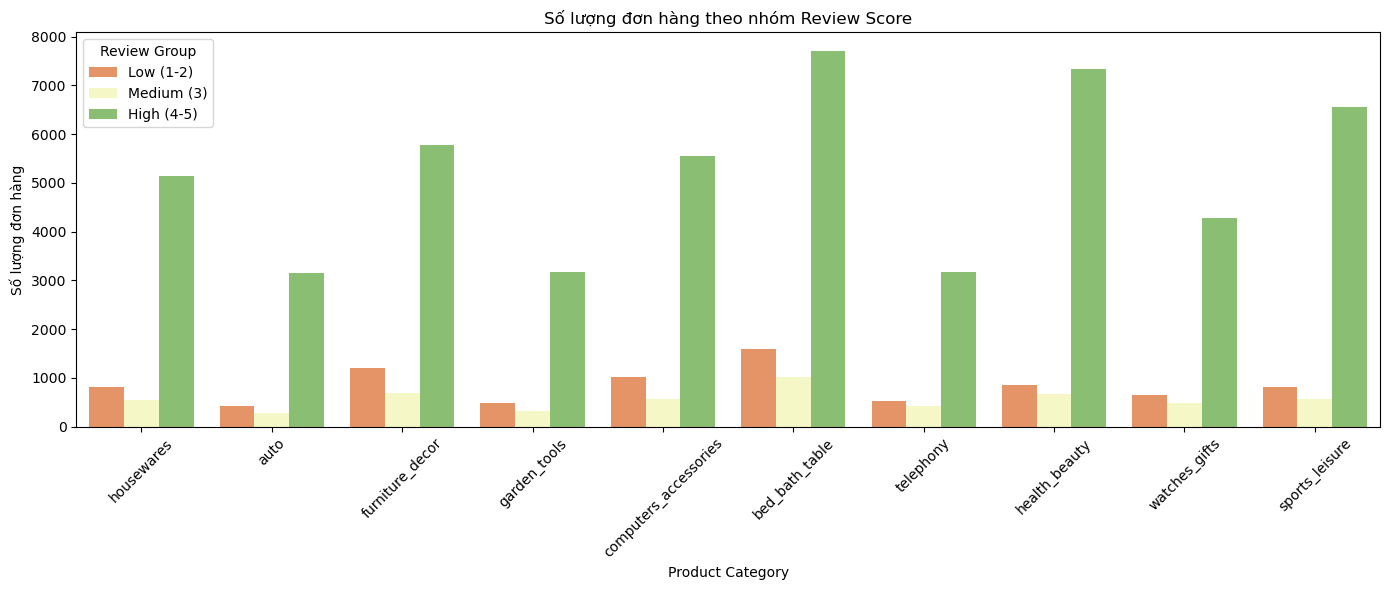

In [35]:
top_categories = df['product_category_name'].value_counts().head(10).index
df_top = df[df['product_category_name'].isin(top_categories)]

# Vẽ grouped bar chart
plt.figure(figsize=(14,6))
sns.countplot(data=df_top, x='product_category_name', hue='review_group', palette='RdYlGn')

plt.xticks(rotation=45)
plt.xlabel('Product Category')
plt.ylabel('Số lượng đơn hàng')
plt.title('Số lượng đơn hàng theo nhóm Review Score')
plt.legend(title='Review Group')
plt.tight_layout()
plt.show()

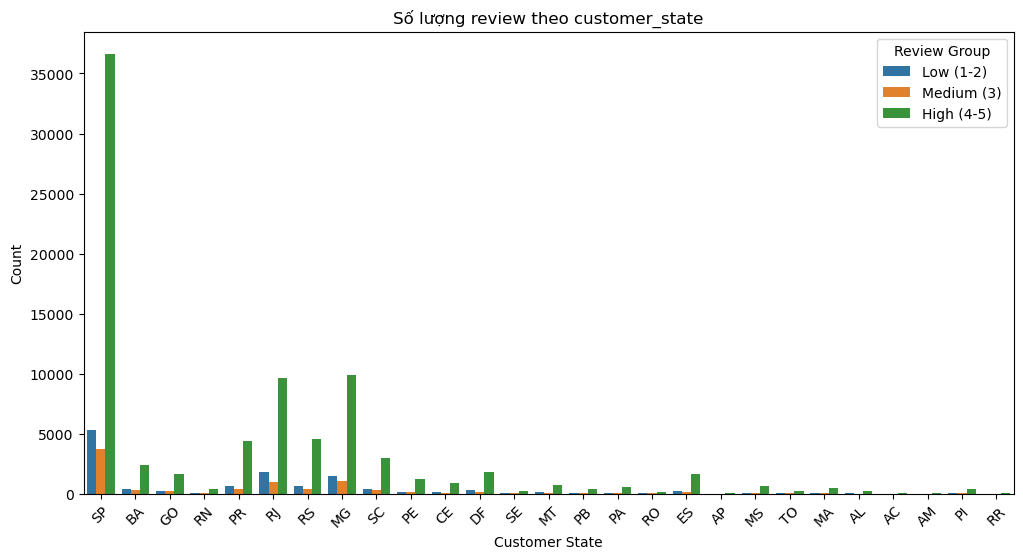

In [36]:
plt.figure(figsize=(12,6))
sns.countplot(x='customer_state', hue='review_group', data=df)
plt.title('Số lượng review theo customer_state')
plt.xlabel('Customer State')
plt.ylabel('Count')
plt.legend(title='Review Group')
plt.xticks(rotation=45)
plt.show()

In [37]:
def categorize_delivery(days):
    if days < 5:
        return 'Early'
    elif days <= 10:
        return 'On Time'
    else:
        return 'Late'


df['delivery_group'] = df['delivery_days'].apply(categorize_delivery)
df

C:\Users\biena\AppData\Local\Temp\ipykernel_13232\3878488174.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['delivery_group'] = df['delivery_days'].apply(categorize_delivery)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,delivery_days,is_late,review_binary,review_group,delivery_group
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,...,4.0,,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,8,0,1,High (4-5),On Time
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,...,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,13,0,1,High (4-5),Late
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,...,5.0,,,2018-08-18 00:00:00,2018-08-22 19:07:58,9,0,1,High (4-5),On Time
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,...,5.0,,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58,13,0,1,High (4-5),Late
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1.0,65266b2da20d04dbe00c5c2d3bb7859e,...,5.0,,,2018-02-17 00:00:00,2018-02-18 13:02:51,2,0,1,High (4-5),Early
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109991,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,...,4.0,,So uma peça que veio rachado mas tudo bem rs,2018-03-01 00:00:00,2018-03-02 17:50:01,22,0,1,High (4-5),Late
109992,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,1.0,b80910977a37536adeddd63663f916ad,...,5.0,,Foi entregue antes do prazo.,2017-09-22 00:00:00,2017-09-22 23:10:57,24,0,1,High (4-5),Late
109993,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,...,2.0,,Foi entregue somente 1. Quero saber do outro p...,2018-01-26 00:00:00,2018-01-27 09:16:56,17,0,0,Low (1-2),Late
109994,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2.0,d1c427060a0f73f6b889a5c7c61f2ac4,...,2.0,,Foi entregue somente 1. Quero saber do outro p...,2018-01-26 00:00:00,2018-01-27 09:16:56,17,0,0,Low (1-2),Late


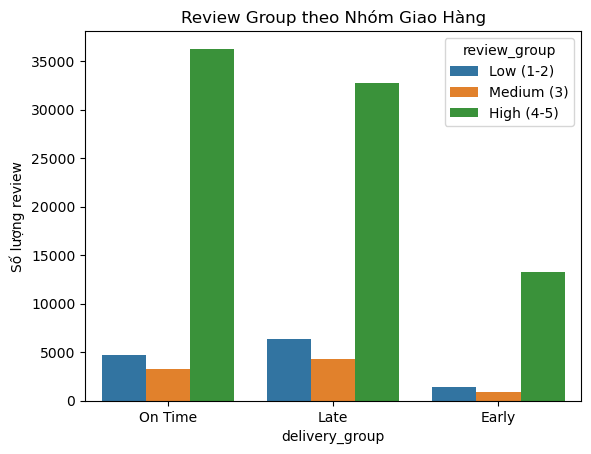

In [38]:
sns.countplot(x='delivery_group', hue='review_group', data=df)
plt.title('Review Group theo Nhóm Giao Hàng')
plt.ylabel('Số lượng review')
plt.show()

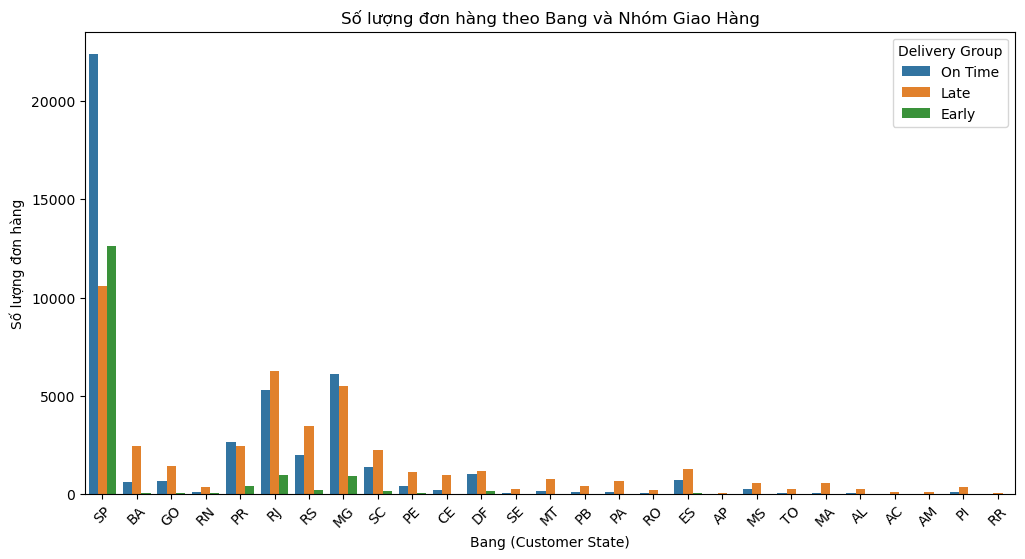

In [39]:
plt.figure(figsize=(12,6))
sns.countplot(x='customer_state', hue='delivery_group', data=df)
plt.title('Số lượng đơn hàng theo Bang và Nhóm Giao Hàng')
plt.xlabel('Bang (Customer State)')
plt.ylabel('Số lượng đơn hàng')
plt.xticks(rotation=45)
plt.legend(title='Delivery Group')
plt.show()

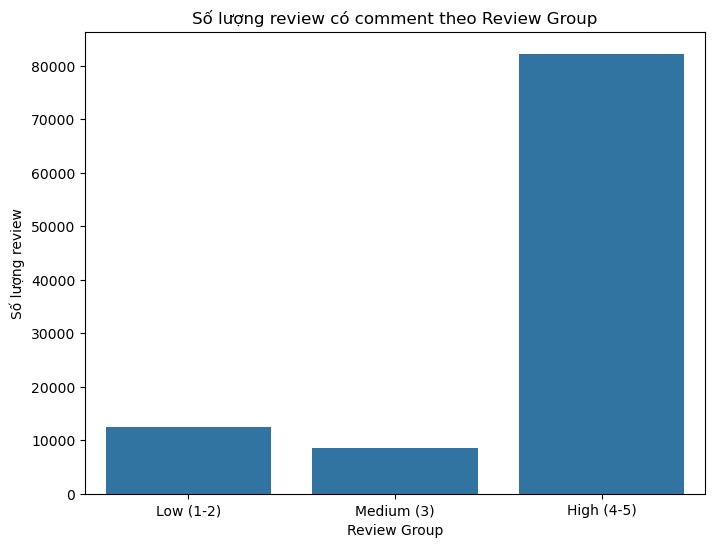

In [40]:
plt.figure(figsize=(8,6))
sns.countplot(x='review_group', 
              data=df[['review_comment_message', 'review_group']],  
              order=['Low (1-2)','Medium (3)','High (4-5)'])
plt.title('Số lượng review có comment theo Review Group')
plt.xlabel('Review Group')
plt.ylabel('Số lượng review')
plt.show()

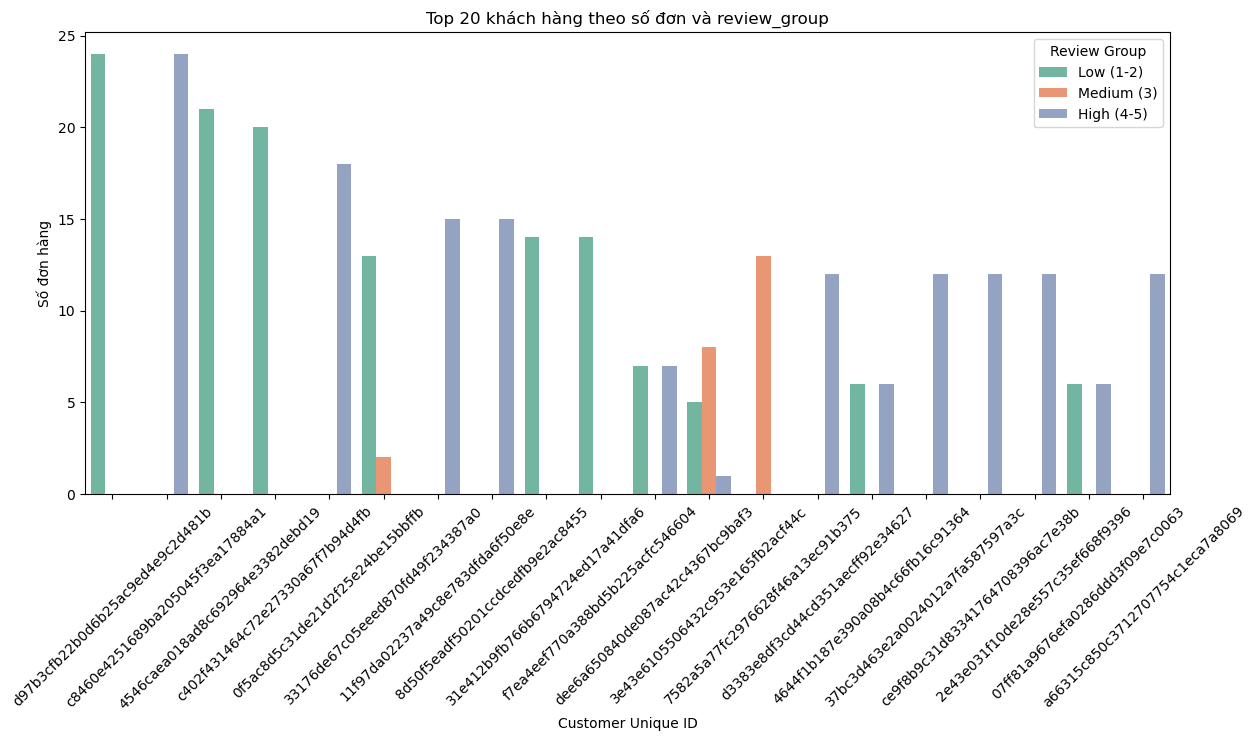

In [41]:
top_customers = df['customer_unique_id'].value_counts().nlargest(20).index
df_top = df[df['customer_unique_id'].isin(top_customers)]

plt.figure(figsize=(14,6))
sns.countplot(
    x='customer_unique_id',
    hue='review_group',   # phân loại theo review_group
    data=df_top,
    order=top_customers,
    palette='Set2'
)
plt.xticks(rotation=45)
plt.title('Top 20 khách hàng theo số đơn và review_group')
plt.xlabel('Customer Unique ID')
plt.ylabel('Số đơn hàng')
plt.legend(title='Review Group')
plt.show()

# 3. HUẤN LUYỆN MÔ HÌNH

## 3.1. Phân loại khách hàng

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103186 entries, 0 to 109995
Data columns (total 37 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   order_id                       103186 non-null  object  
 1   customer_id                    103186 non-null  object  
 2   order_status                   103186 non-null  object  
 3   order_purchase_timestamp       103186 non-null  object  
 4   order_approved_at              103186 non-null  object  
 5   order_delivered_carrier_date   103186 non-null  object  
 6   order_delivered_customer_date  103186 non-null  object  
 7   order_estimated_delivery_date  103186 non-null  object  
 8   order_item_id                  103186 non-null  float64 
 9   product_id                     103186 non-null  object  
 10  seller_id                      103186 non-null  object  
 11  shipping_limit_date            103186 non-null  object  
 12  price                

In [43]:
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])

# Ngày tham chiếu để tính Recency
snapshot_date = df['order_delivered_customer_date'].max() + pd.Timedelta(days=1)

# Tính RFM trực tiếp mà không tạo cột Monetary riêng
rfm = df.groupby('customer_unique_id').agg(
    Recency = ('order_delivered_customer_date', lambda x: (snapshot_date - x.max()).days),
    Frequency = ('order_id', 'count'),
    Monetary = ('price', lambda x: (x + df.loc[x.index, 'freight_value']).sum())
).reset_index()

C:\Users\biena\AppData\Local\Temp\ipykernel_13232\1451074021.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])


In [44]:
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,delivery_days,is_late,review_binary,review_group,delivery_group
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,...,4.0,,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,8,0,1,High (4-5),On Time
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,...,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,13,0,1,High (4-5),Late
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,...,5.0,,,2018-08-18 00:00:00,2018-08-22 19:07:58,9,0,1,High (4-5),On Time
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,...,5.0,,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58,13,0,1,High (4-5),Late
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1.0,65266b2da20d04dbe00c5c2d3bb7859e,...,5.0,,,2018-02-17 00:00:00,2018-02-18 13:02:51,2,0,1,High (4-5),Early
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109991,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,...,4.0,,So uma peça que veio rachado mas tudo bem rs,2018-03-01 00:00:00,2018-03-02 17:50:01,22,0,1,High (4-5),Late
109992,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,1.0,b80910977a37536adeddd63663f916ad,...,5.0,,Foi entregue antes do prazo.,2017-09-22 00:00:00,2017-09-22 23:10:57,24,0,1,High (4-5),Late
109993,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,...,2.0,,Foi entregue somente 1. Quero saber do outro p...,2018-01-26 00:00:00,2018-01-27 09:16:56,17,0,0,Low (1-2),Late
109994,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2.0,d1c427060a0f73f6b889a5c7c61f2ac4,...,2.0,,Foi entregue somente 1. Quero saber do outro p...,2018-01-26 00:00:00,2018-01-27 09:16:56,17,0,0,Low (1-2),Late


In [45]:
df_rfm = pd.read_csv("rfm.csv")
df_rfm

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,118,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,124,1,27.19
2,0000f46a3911fa3c0805444483337064,524,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,314,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,287,1,196.89
...,...,...,...,...
86882,fffb09418989a0dbff854a28163e47c6,259,1,73.16
86883,fffbf87b7a1a6fa8b03f081c5f51a201,239,1,167.32
86884,ffff371b4d645b6ecea244b27531430a,566,1,112.46
86885,ffff5962728ec6157033ef9805bacc48,120,1,133.69


In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [47]:
df_rfm['R_score'] = pd.qcut(df_rfm['Recency'], 5, labels=[5,4,3,2,1])  
df_rfm['F_score'] = pd.qcut(df_rfm['Frequency'].rank(method='first'), 5, labels=[1,2,3,4,5])
df_rfm['M_score'] = pd.qcut(df_rfm['Monetary'], 5, labels=[1,2,3,4,5])

In [48]:
df_rfm['RFM_Score'] = df_rfm['R_score'].astype(str) + df_rfm['F_score'].astype(str) + df_rfm['M_score'].astype(str)

In [49]:
df_rfm

,customer_unique_id,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score
0,0000366f3b9a7992bf8c76cfdf3221e2,118,1,141.90,4,1,4,414
1,0000b849f77a49e4a4ce2b2a4ca5be3f,124,1,27.19,4,1,1,411
2,0000f46a3911fa3c0805444483337064,524,1,86.22,1,1,3,113
3,0000f6ccb0745a6a4b88665a16c9f078,314,1,43.62,2,1,1,211
4,0004aac84e0df4da2b147fca70cf8255,287,1,196.89,2,1,4,214
...,...,...,...,...,...,...,...,...
86882,fffb09418989a0dbff854a28163e47c6,259,1,73.16,3,5,2,352
86883,fffbf87b7a1a6fa8b03f081c5f51a201,239,1,167.32,3,5,4,354
86884,ffff371b4d645b6ecea244b27531430a,566,1,112.46,1,5,3,153
86885,ffff5962728ec6157033ef9805bacc48,120,1,133.69,4,5,4,454


In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [51]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(df_rfm[['Recency','Frequency','Monetary']])

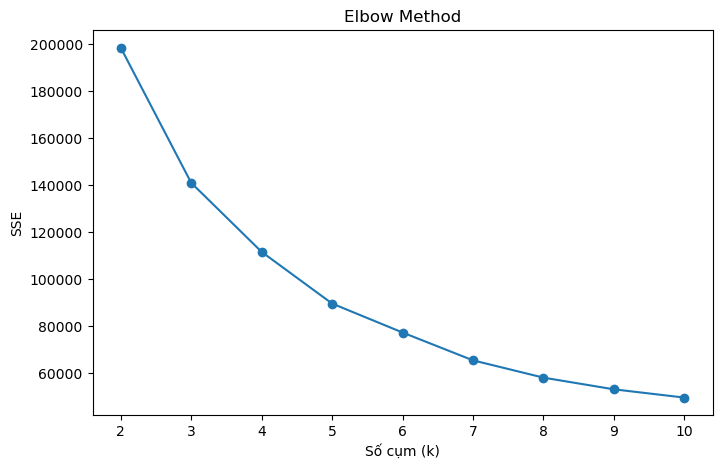

In [52]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = []
k_range = range(2, 11)  # thử từ 2 đến 10 cụm

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Số cụm (k)')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

In [53]:
kmeans = KMeans(n_clusters=4, random_state=42)
df_rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

In [54]:
cluster_summary = df_rfm.groupby('Cluster')[['Recency','Frequency','Monetary']].mean().round(1)
cluster_summary

,Recency,Frequency,Monetary
Cluster,,,
0,402.4,1.1,128.8
1,132.9,1.0,126.9
2,194.8,2.6,240.9
3,233.2,1.3,1241.3


In [55]:
segment_map = {
    0: "Lost Customers",
    1: "New Customers",
    2: "Potential Loyalists",
    3: "VIP"
}

df_rfm["Customer_Segment"] = df_rfm["Cluster"].map(segment_map)

In [56]:
df_rfm

,customer_unique_id,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score,Cluster,Customer_Segment
0,0000366f3b9a7992bf8c76cfdf3221e2,118,1,141.90,4,1,4,414,1,New Customers
1,0000b849f77a49e4a4ce2b2a4ca5be3f,124,1,27.19,4,1,1,411,1,New Customers
2,0000f46a3911fa3c0805444483337064,524,1,86.22,1,1,3,113,0,Lost Customers
3,0000f6ccb0745a6a4b88665a16c9f078,314,1,43.62,2,1,1,211,0,Lost Customers
4,0004aac84e0df4da2b147fca70cf8255,287,1,196.89,2,1,4,214,0,Lost Customers
...,...,...,...,...,...,...,...,...,...,...
86882,fffb09418989a0dbff854a28163e47c6,259,1,73.16,3,5,2,352,1,New Customers
86883,fffbf87b7a1a6fa8b03f081c5f51a201,239,1,167.32,3,5,4,354,1,New Customers
86884,ffff371b4d645b6ecea244b27531430a,566,1,112.46,1,5,3,153,0,Lost Customers
86885,ffff5962728ec6157033ef9805bacc48,120,1,133.69,4,5,4,454,1,New Customers


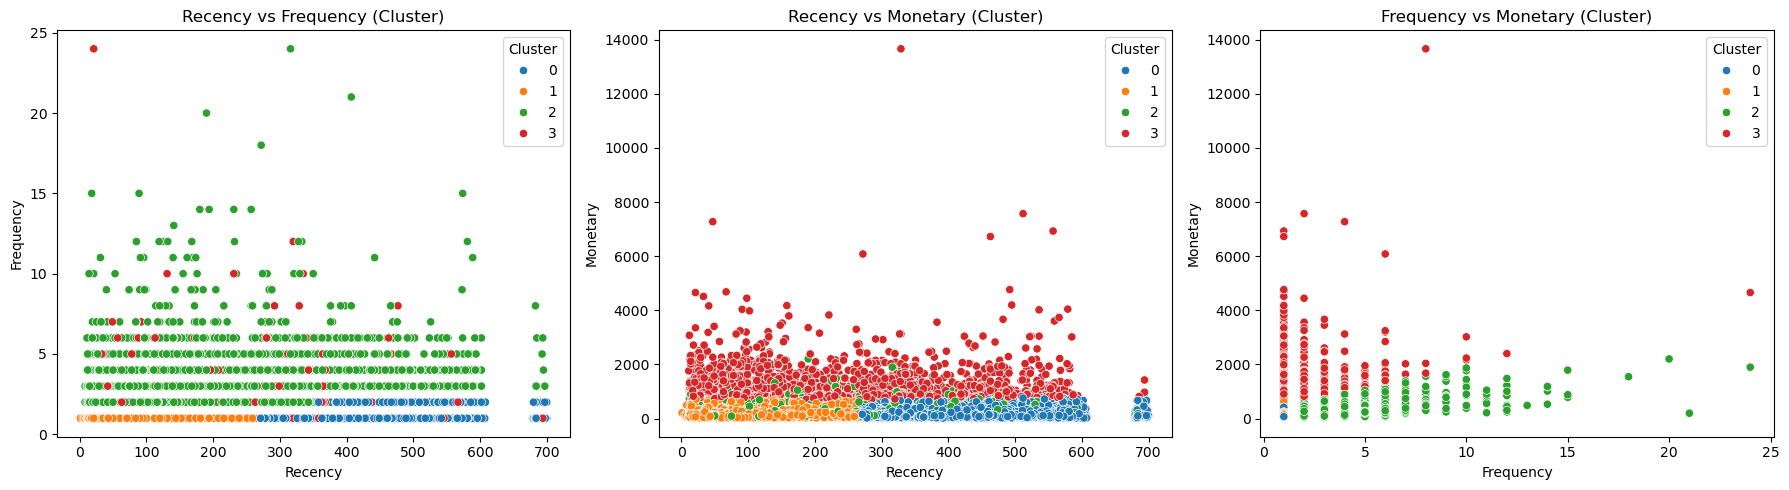

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18,5))

# 1. Recency – Frequency
plt.subplot(1,3,1)
sns.scatterplot(data=df_rfm, x='Recency', y='Frequency', hue='Cluster', palette='tab10')
plt.title('Recency vs Frequency (Cluster)')

# 2. Recency – Monetary
plt.subplot(1,3,2)
sns.scatterplot(data=df_rfm, x='Recency', y='Monetary', hue='Cluster', palette='tab10')
plt.title('Recency vs Monetary (Cluster)')

# 3. Frequency – Monetary
plt.subplot(1,3,3)
sns.scatterplot(data=df_rfm, x='Frequency', y='Monetary', hue='Cluster', palette='tab10')
plt.title('Frequency vs Monetary (Cluster)')

plt.tight_layout()
plt.show()

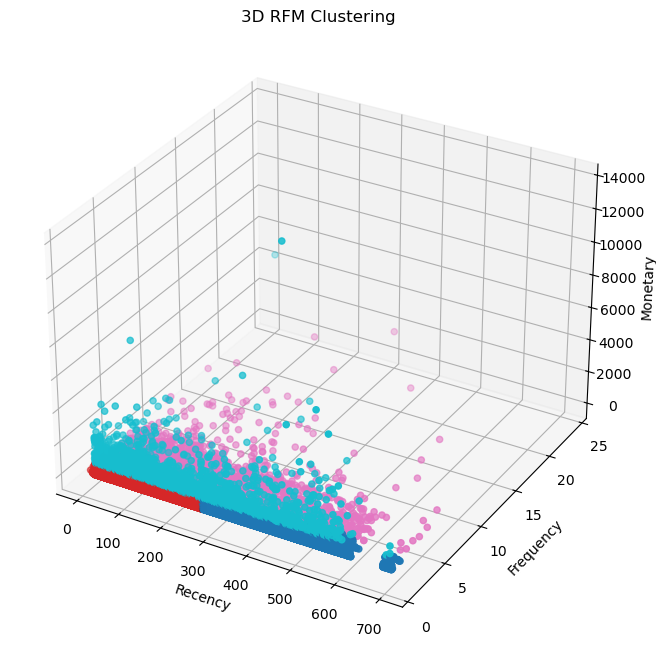

In [58]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    df_rfm['Recency'], 
    df_rfm['Frequency'], 
    df_rfm['Monetary'], 
    c=df_rfm['Cluster'], cmap='tab10'
)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('3D RFM Clustering')

plt.show()

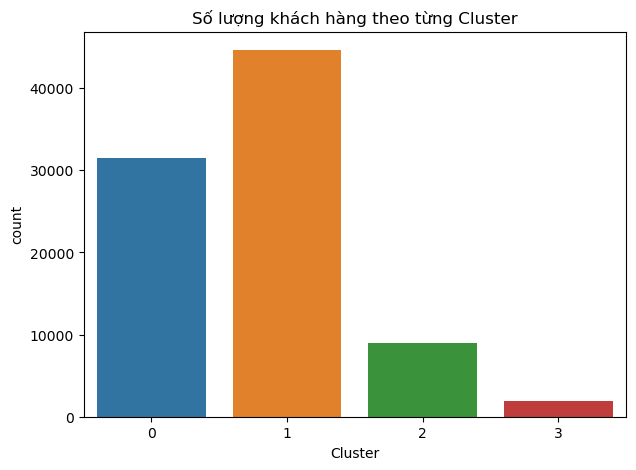

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
sns.countplot(data=df_rfm, x='Cluster', hue='Cluster', palette='tab10', legend=False)
plt.title('Số lượng khách hàng theo từng Cluster')
plt.show()

In [60]:
from sklearn.metrics import silhouette_score

score = silhouette_score(rfm_scaled, df_rfm['Cluster'])
print("Silhouette Score:", score)

Silhouette Score: 0.45303966608069035


## 3.2. Khai phá luật kết hợp

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103186 entries, 0 to 109995
Data columns (total 37 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       103186 non-null  object        
 1   customer_id                    103186 non-null  object        
 2   order_status                   103186 non-null  object        
 3   order_purchase_timestamp       103186 non-null  object        
 4   order_approved_at              103186 non-null  object        
 5   order_delivered_carrier_date   103186 non-null  object        
 6   order_delivered_customer_date  103186 non-null  datetime64[ns]
 7   order_estimated_delivery_date  103186 non-null  object        
 8   order_item_id                  103186 non-null  float64       
 9   product_id                     103186 non-null  object        
 10  seller_id                      103186 non-null  object        
 11  shipp

In [62]:
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,delivery_days,is_late,review_binary,review_group,delivery_group
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,...,4.0,,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,8,0,1,High (4-5),On Time
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,...,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,13,0,1,High (4-5),Late
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,...,5.0,,,2018-08-18 00:00:00,2018-08-22 19:07:58,9,0,1,High (4-5),On Time
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,...,5.0,,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58,13,0,1,High (4-5),Late
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1.0,65266b2da20d04dbe00c5c2d3bb7859e,...,5.0,,,2018-02-17 00:00:00,2018-02-18 13:02:51,2,0,1,High (4-5),Early
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109991,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,...,4.0,,So uma peça que veio rachado mas tudo bem rs,2018-03-01 00:00:00,2018-03-02 17:50:01,22,0,1,High (4-5),Late
109992,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,1.0,b80910977a37536adeddd63663f916ad,...,5.0,,Foi entregue antes do prazo.,2017-09-22 00:00:00,2017-09-22 23:10:57,24,0,1,High (4-5),Late
109993,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,...,2.0,,Foi entregue somente 1. Quero saber do outro p...,2018-01-26 00:00:00,2018-01-27 09:16:56,17,0,0,Low (1-2),Late
109994,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2.0,d1c427060a0f73f6b889a5c7c61f2ac4,...,2.0,,Foi entregue somente 1. Quero saber do outro p...,2018-01-26 00:00:00,2018-01-27 09:16:56,17,0,0,Low (1-2),Late


In [63]:
import sys
!{sys.executable} -m pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [81]:
product_counts = df['product_category_name'].value_counts()

In [82]:
top10_products = product_counts.head(10)

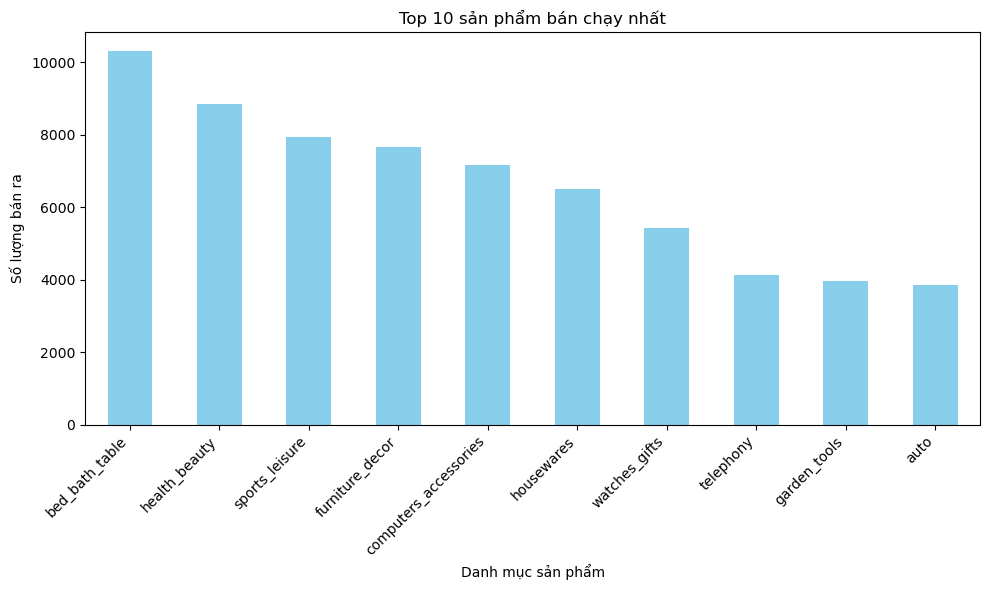

In [83]:
plt.figure(figsize=(10,6))
top10_products.plot(kind='bar', color='skyblue')
plt.title("Top 10 sản phẩm bán chạy nhất")
plt.xlabel("Danh mục sản phẩm")
plt.ylabel("Số lượng bán ra")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [84]:
order_counts = df.groupby('order_id')['product_category_name'].count()

In [85]:
top20_orders = order_counts.sort_values(ascending=False).head(20)

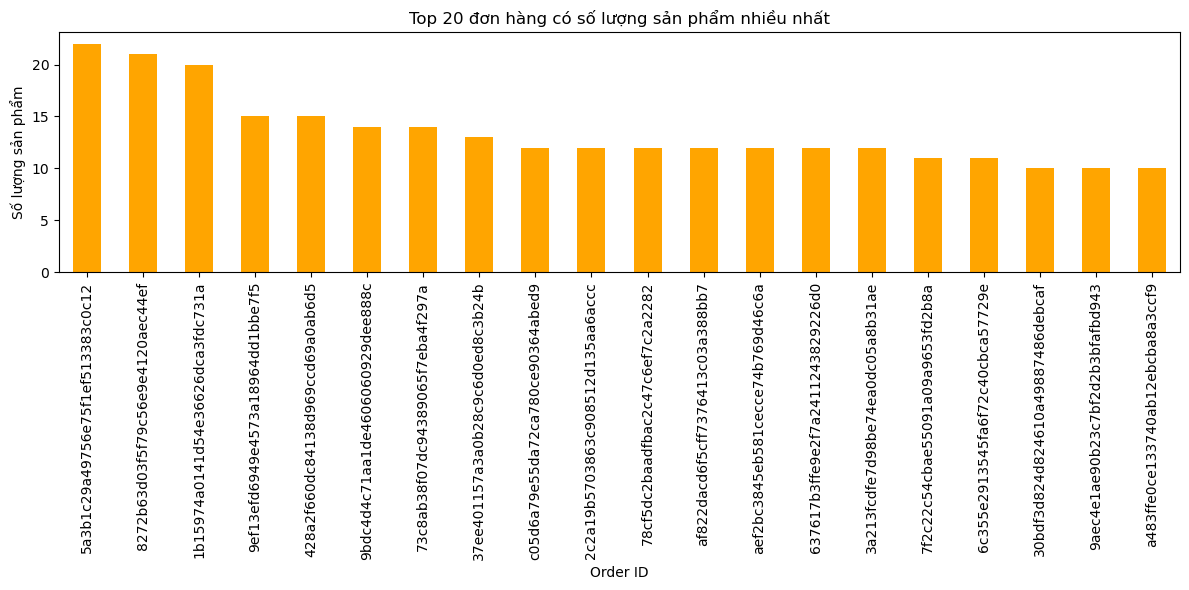

In [86]:
plt.figure(figsize=(12,6))
top20_orders.plot(kind='bar', color='orange')
plt.title("Top 20 đơn hàng có số lượng sản phẩm nhiều nhất")
plt.xlabel("Order ID")
plt.ylabel("Số lượng sản phẩm")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [162]:
orders_multi_items = df.groupby('order_id')['product_category_name'].nunique()
orders_multi_items = orders_multi_items[orders_multi_items >= 2].index


In [163]:
df_filtered = df[df['order_id'].isin(orders_multi_items)]

In [164]:
df_filtered

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,delivery_days,is_late,review_binary,review_group,delivery_group
65,688052146432ef8253587b930b01a06d,81e08b08e5ed4472008030d70327c71f,delivered,2018-04-22 08:48:13,2018-04-24 18:25:22,2018-04-23 19:19:14,2018-04-24 19:31:58,2018-05-15,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,...,4.0,Produto entregue em parte,Somente a Mala Pequena Bordo Avião 360º Viagem...,2018-04-25 00:00:00,2018-04-27 22:09:02,2,0,1,High (4-5),Early
66,688052146432ef8253587b930b01a06d,81e08b08e5ed4472008030d70327c71f,delivered,2018-04-22 08:48:13,2018-04-24 18:25:22,2018-04-23 19:19:14,2018-04-24 19:31:58,2018-05-15,2.0,db56f6d2b04c89eae4daba188842fd7b,...,4.0,Produto entregue em parte,Somente a Mala Pequena Bordo Avião 360º Viagem...,2018-04-25 00:00:00,2018-04-27 22:09:02,2,0,1,High (4-5),Early
134,f2fa3795760c35b8c05fa8e2f09d5143,fac60d7c4df3896a5af5db6c91e03797,delivered,2018-03-31 14:20:46,2018-04-03 05:10:21,2018-04-05 00:44:42,2018-04-07 00:06:33,2018-05-04,1.0,120fa011365fc39efe382cba4e50999e,...,3.0,,Só foi entregue 1 dos 3 produtos q comprei,2018-04-08 00:00:00,2018-04-08 17:18:09,6,0,0,Medium (3),On Time
135,f2fa3795760c35b8c05fa8e2f09d5143,fac60d7c4df3896a5af5db6c91e03797,delivered,2018-03-31 14:20:46,2018-04-03 05:10:21,2018-04-05 00:44:42,2018-04-07 00:06:33,2018-05-04,2.0,68a058d125ba1544e726898f0b8c0523,...,3.0,,Só foi entregue 1 dos 3 produtos q comprei,2018-04-08 00:00:00,2018-04-08 17:18:09,6,0,0,Medium (3),On Time
136,f2fa3795760c35b8c05fa8e2f09d5143,fac60d7c4df3896a5af5db6c91e03797,delivered,2018-03-31 14:20:46,2018-04-03 05:10:21,2018-04-05 00:44:42,2018-04-07 00:06:33,2018-05-04,3.0,eab67bf937aaadc19f83383a331d2dd9,...,3.0,,Só foi entregue 1 dos 3 produtos q comprei,2018-04-08 00:00:00,2018-04-08 17:18:09,6,0,0,Medium (3),On Time
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109039,122ebb4ea3cb1281899533fc66f7d179,197291e1226b07030a319b27281fded0,delivered,2018-01-20 15:11:37,2018-01-22 13:51:46,2018-01-23 20:32:27,2018-01-25 23:09:12,2018-02-19,2.0,d1c427060a0f73f6b889a5c7c61f2ac4,...,5.0,,"Foi entregue o produto, conforme o previsto",2018-01-26 00:00:00,2018-03-05 17:26:38,5,0,1,High (4-5),On Time
109214,623906ceb400510974acad2860500532,bbfec30263d2f8e19e695453564a007a,delivered,2018-06-19 19:05:34,2018-06-19 19:35:56,2018-06-20 14:45:00,2018-06-25 18:03:14,2018-07-11,1.0,35afc973633aaeb6b877ff57b2793310,...,5.0,Muito bom,Otimo,2018-06-26 00:00:00,2018-06-27 15:59:11,5,0,1,High (4-5),On Time
109215,623906ceb400510974acad2860500532,bbfec30263d2f8e19e695453564a007a,delivered,2018-06-19 19:05:34,2018-06-19 19:35:56,2018-06-20 14:45:00,2018-06-25 18:03:14,2018-07-11,2.0,99a4788cb24856965c36a24e339b6058,...,5.0,Muito bom,Otimo,2018-06-26 00:00:00,2018-06-27 15:59:11,5,0,1,High (4-5),On Time
109237,48f3a0cfae19477fb7c023ef6e092dd1,76468fc2e290875c93f53af327982889,delivered,2018-03-19 10:05:40,2018-03-19 10:27:09,2018-03-20 17:52:11,2018-03-27 20:19:24,2018-04-06,1.0,fbc1488c1a1e72ba175f53ab29a248e8,...,5.0,,,2018-03-22 00:00:00,2018-03-24 21:59:11,8,0,1,High (4-5),On Time


In [165]:
transactions = df_filtered.groupby('order_id')['product_category_name'].apply(list)
transactions = transactions.tolist()

In [166]:
transactions

[['consoles_games', 'toys'],
 ['toys', 'baby', 'baby'],
 ['perfumery', 'sports_leisure'],
 ['bed_bath_table', 'housewares'],
 ['garden_tools', 'stationery'],
 ['health_beauty', 'market_place'],
 ['stationery', 'computers_accessories'],
 ['cool_stuff', 'sports_leisure'],
 ['kitchen_dining_laundry_garden_furniture', 'housewares'],
 ['cool_stuff', 'baby', 'baby'],
 ['computers_accessories', 'telephony'],
 ['furniture_decor', 'furniture_decor', 'musical_instruments'],
 ['housewares', 'health_beauty'],
 ['furniture_decor', 'furniture_decor', 'construction_tools_lights'],
 ['housewares', 'housewares', 'food_drink'],
 ['stationery', 'luggage_accessories'],
 ['cool_stuff', 'telephony'],
 ['perfumery', 'sports_leisure'],
 ['sports_leisure', 'housewares'],
 ['bed_bath_table', 'costruction_tools_garden'],
 ['health_beauty', 'baby'],
 ['audio', 'watches_gifts'],
 ['furniture_decor', 'home_construction'],
 ['bed_bath_table', 'furniture_decor'],
 ['furniture_decor', 'home_confort'],
 ['toys', 'perfu

In [167]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
basket = pd.DataFrame(te_ary, columns=te.columns_)

print("Kích thước ma trận:", basket.shape)

Kích thước ma trận: (762, 62)


In [168]:
from mlxtend.frequent_patterns import apriori

# min_support thử khoảng 0.01
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)

# Tính số lượng item trong mỗi itemset
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

In [169]:
top_combo = frequent_itemsets[frequent_itemsets['length'] >= 2] \
            .sort_values(by='support', ascending=False) \
            .head(10)

print(top_combo)

     support                              itemsets  length
37  0.087927     (furniture_decor, bed_bath_table)       2
39  0.053806        (home_confort, bed_bath_table)       2
46  0.031496         (furniture_decor, housewares)       2
40  0.026247          (housewares, bed_bath_table)       2
35  0.024934                          (baby, toys)       2
33  0.023622                    (baby, cool_stuff)       2
32  0.022310                (baby, bed_bath_table)       2
44  0.020997       (garden_tools, furniture_decor)       2
49  0.018373       (sports_leisure, health_beauty)       2
45  0.017060  (furniture_decor, home_construction)       2


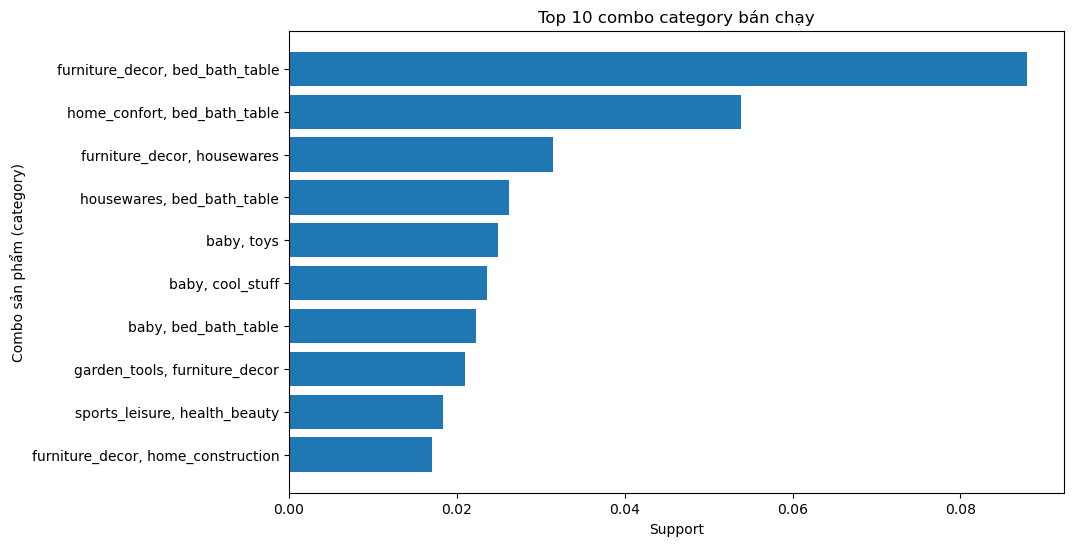

In [170]:
import matplotlib.pyplot as plt

# Chuyển frozenset sang chuỗi dễ đọc
top_combo['itemsets_str'] = top_combo['itemsets'].apply(lambda x: ', '.join(list(x)))

plt.figure(figsize=(10,6))
plt.barh(top_combo['itemsets_str'], top_combo['support'])
plt.xlabel('Support')
plt.ylabel('Combo sản phẩm (category)')
plt.title('Top 10 combo category bán chạy')
plt.gca().invert_yaxis()
plt.show()

In [180]:
from mlxtend.frequent_patterns import apriori, association_rules

# 1. Frequent itemsets từ 1 sản phẩm trở lên
frequent_itemsets_all = apriori(basket, min_support=0.01, use_colnames=True)
frequent_itemsets_all['length'] = frequent_itemsets_all['itemsets'].apply(lambda x: len(x))

# 2. Tạo luật kết hợp
rules = association_rules(frequent_itemsets_all, metric="confidence", min_threshold=0.025)

# 3. Chuyển frozenset sang string dễ đọc
rules['antecedents_str'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
rules['consequents_str'] = rules['consequents'].apply(lambda x: ', '.join(list(x)))

# 4. Lọc chỉ combo ≥2 sản phẩm (tổng antecedent + consequent)
top_rules = rules[(rules['antecedents'].apply(len) + rules['consequents'].apply(len)) >= 2] \
             .sort_values(by='lift', ascending=False).head(10)

top_rules[['antecedents_str','consequents_str','support','confidence','lift']]

,antecedents_str,consequents_str,support,confidence,lift
22,unknown,fashion_bags_accessories,0.010499,0.140351,6.291022
23,fashion_bags_accessories,unknown,0.010499,0.470588,6.291022
33,health_beauty,perfumery,0.015748,0.166667,4.535714
32,perfumery,health_beauty,0.015748,0.428571,4.535714
15,bed_bath_table,home_confort,0.053806,0.208122,3.303934
14,home_confort,bed_bath_table,0.053806,0.854167,3.303934
6,baby,toys,0.024934,0.211111,3.282993
7,toys,baby,0.024934,0.387755,3.282993
2,baby,cool_stuff,0.023622,0.200000,2.381250
3,cool_stuff,baby,0.023622,0.281250,2.381250


In [181]:
top_combo.to_csv("top_combo.csv", index=False)
top_combo.to_pickle("top_combo.pkl")

In [182]:
top_rules.to_csv("top_rules.csv", index=False)
top_rules.to_pickle("top_rules.pkl")